# List of Contents 

#### This notebook answers questions 5-9 of Task 4.10

## 1. Importing Libraries and Data
#### 1.1 Additional Flagging and Subsetting
## 2. Customer Profiling: Behavior of Customers by Group
#### 2.1 Customers by Age (Spending Habits, Frequency, Loyalty, Family Status, # of Dependants, Day of Week and Mean Prices)
#### 2.2 Customers by Loyalty Status (Spending Habits, Frequency, Mean Prices, Family Status, # of Dependants)
#### 2.3 Customers by Income (High spenders, Frequency, Loyalty Status, Family Status, # of Dependants)
#### 2.4 Customers by Family Status (Income, Age, Spending Habits)
#### 2.5 Customers by Number of Dependants (Spending Habits)
#### 2.6 Customers by Region (High Spenders, Spending Habits, Mean Prices, Loyalty)
## 3. Products
#### 3.1 Products by Department
#### 3.2. Products by Price Range
## 4. Exporting Relevant Visualizations

## 1. Importing Libraries and Data

In [1]:
#Import Libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#Set Path
path = r'/Users/tristansavella/Instacart Basket Analysis'

In [3]:
#import df_active_customers
df_active_customers = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'active_customers_task410_part1.pkl'))

In [4]:
#Show all columns
pd.set_option('display.max_columns', None)

In [5]:
df_active_customers.head()

,Unnamed: 0,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_passed_since_last_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,Spending_Flag,Frequency_Flag,median_days_passed,gender,state,age,date_joined,n_dependants,fam_status,income,department,regions,activity_flag
0,0,2539329,1,prior,1,2,8,NaN,196,1,0,both,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,Non-Frequent customer,20.5,Female,Alabama,31,2/17/2019,3,married,40423,beverages,South,Regular activity
1,1,2398795,1,prior,2,3,7,15.0,196,1,1,both,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,Non-Frequent customer,20.5,Female,Alabama,31,2/17/2019,3,married,40423,beverages,South,Regular activity
2,2,473747,1,prior,3,3,12,21.0,196,1,1,both,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,Non-Frequent customer,20.5,Female,Alabama,31,2/17/2019,3,married,40423,beverages,South,Regular activity
3,3,2254736,1,prior,4,4,7,29.0,196,1,1,both,Soda,77,7,9.0,Mid-range product,Least busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,Non-Frequent customer,20.5,Female,Alabama,31,2/17/2019,3,married,40423,beverages,South,Regular activity
4,4,431534,1,prior,5,4,15,28.0,196,1,1,both,Soda,77,7,9.0,Mid-range product,Least busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,Non-Frequent customer,20.5,Female,Alabama,31,2/17/2019,3,married,40423,beverages,South,Regular activity


### 1.1 Final Flagging

Final flags have been added here at the start of the notebook to avoid later problems when running the codes. These flags should be run before creating the subsets in section 1.2.


##### income_flag: Defining income levels

In [6]:
#flag for high-income
df_active_customers.loc[(df_active_customers['income'] >130000), 'income_flag'] = 'high-income'

In [7]:
#flag for low-income
df_active_customers.loc[(df_active_customers['income'] <65000), 'income_flag'] = 'low-income'

In [8]:
#flag for middle-income
df_active_customers.loc[(df_active_customers['income'] >=65000) & (df_active_customers['income'] <=130000), 'income_flag'] = 'middle-income'

In [9]:
#checking output
df_active_customers['income_flag'].value_counts()

income_flag
middle-income    16470561
high-income       7407841
low-income        7114262
Name: count, dtype: int64

##### Age Groups

In [10]:
#flag for age group 18-34
df_active_customers.loc[(df_active_customers['age'] >=18) & (df_active_customers['age'] <35), 'age_group'] = '18-34'

In [11]:
#flag for age group 35-49
df_active_customers.loc[(df_active_customers['age'] >=35) & (df_active_customers['age'] <50), 'age_group'] = '35-49'

In [12]:
#flag for age group 50-64
df_active_customers.loc[(df_active_customers['age'] >=50) & (df_active_customers['age'] <64), 'age_group'] = '50-64'

In [13]:
#flag for age group 65+
df_active_customers.loc[(df_active_customers['age'] >64), 'age_group'] = '65+'

In [14]:
# Distribution of 'age_group'
df_active_customers['age_group'].value_counts()

age_group
18-34    8249797
65+      8202746
35-49    7312428
50-64    6722462
Name: count, dtype: int64

### 1.2 Final Subsetting

The dataframes/subsets will be used throughout this notebook. Crosstabs are not included here and are created as needed throughout the notebook.

##### High spenders and Low spenders 

In [11]:
df_lowspenders = df_active_customers[(df_active_customers['Spending_Flag'])=='Low spender']

In [46]:
df_highspenders = df_active_customers[(df_active_customers['Spending_Flag'])=='High spender']

##### For Each Loyalty Group

In [13]:
#Subset 1: Loyal Customers
df_loyal_customer = df_active_customers[df_active_customers['loyalty_flag']=='Loyal customer']

In [14]:
#Subset 2: Regular Customers
df_regular_customer = df_active_customers[df_active_customers['loyalty_flag']=='Regular customer']

In [15]:
#Subset 3: New Customers
df_new_customer = df_active_customers[df_active_customers['loyalty_flag']=='New customer']

##### For Customers of Each Family Status Category

In [16]:
#Subset 1: "living with parents and siblings"
df_livingwithparents = df_active_customers[df_active_customers['fam_status']=='living with parents and siblings']

In [17]:
#Subset 2: "Divorced and Widowed"
df_divorced_widowed = df_active_customers[df_active_customers['fam_status']=='divorced/widowed']

In [18]:
#Subset 3: "Married"
df_married = df_active_customers[df_active_customers['fam_status']=='married']

In [19]:
#Subset 4: "single"
df_single = df_active_customers[df_active_customers['fam_status']=='single']

##### For Income Level

In [20]:
#Subset 1: High and Low Income Only
df_highlowincome = df_active_customers[df_active_customers['income_flag']!='middle-income']

In [21]:
#Subset 2: High Income Only
df_highincome = df_active_customers[df_active_customers['income_flag']=='high-income']

In [22]:
#Subset 3: Low Income Only
df_lowincome = df_active_customers[df_active_customers['income_flag']=='low-income']

In [23]:
#Subset 4: Middle Income Only
df_lowincome = df_active_customers[df_active_customers['income_flag']=='middle-income']

#### For High Range Products

In [62]:
df_highrange = df_active_customers[df_active_customers['price_range_loc']=='High-range product']

## 2. Customer Profiling

Question 5
The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

### 2.1: Profile based on Age

In [6]:
#Checking 'Age'
df_active_customers['age'].describe()

count    3.099266e+07
mean     4.946793e+01
std      1.848520e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

In [71]:
# Distribution of 'age_group'
df_active_customers['age_group'].value_counts()

age_group
18-34    8249797
65+      8202746
35-49    7312428
50-64    6722462
Name: count, dtype: int64

Text(0.5, 1.0, 'Number of Customers by Age Group')

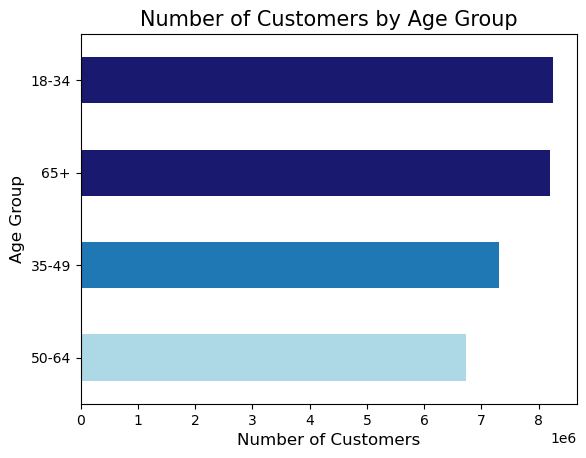

In [29]:
#visualization
bar_age_group = df_active_customers['age_group'].value_counts().sort_values( ).plot.barh(color = ['lightblue', 'tab:blue', 'midnightblue','midnightblue'])
plt.ylabel('Age Group', fontsize=12)
plt.xlabel('Number of Customers', fontsize=12) 
plt.title('Number of Customers by Age Group', fontsize=15)

#### 2.1a: Spending Habits by Age Group

In [13]:
crosstab_age_spendingflag = pd.crosstab(df_active_customers['age_group'], df_active_customers['Spending_Flag'], dropna = False)

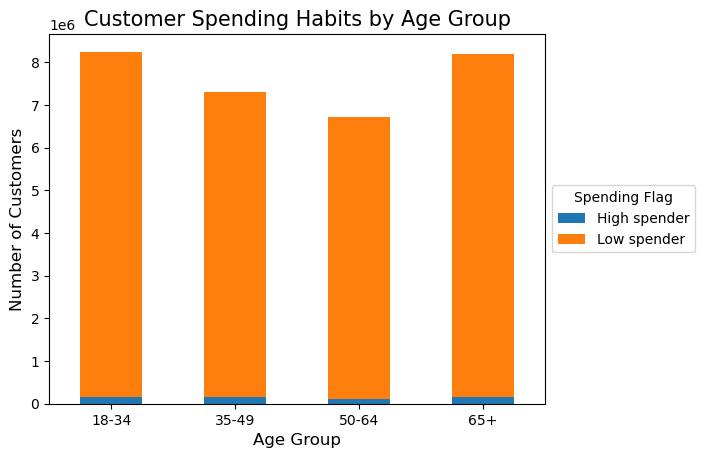

In [14]:
stackedbar_agegroup_spendingflag = crosstab_age_spendingflag.plot(kind="bar", stacked=True, rot=0)
plt.ylabel('Number of Customers', fontsize=12)
plt.xlabel('Age Group', fontsize=12) 
plt.title('Customer Spending Habits by Age Group', fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title = 'Spending Flag')

In [15]:
crosstab_age_spendingflag

Spending_Flag,High spender,Low spender
age_group,,
18-34,149859,8099938
35-49,160219,7152209
50-64,121583,6600879
65+,157019,8045727


#### High Spenders by Age Group

In [73]:
df_lowspenders = df_active_customers[(df_active_customers['Spending_Flag'])=='Low spender']

In [74]:
df_highspenders = df_active_customers[(df_active_customers['Spending_Flag'])=='High spender']

Text(0.5, 1.0, 'Number of High and Low Spending Customers')

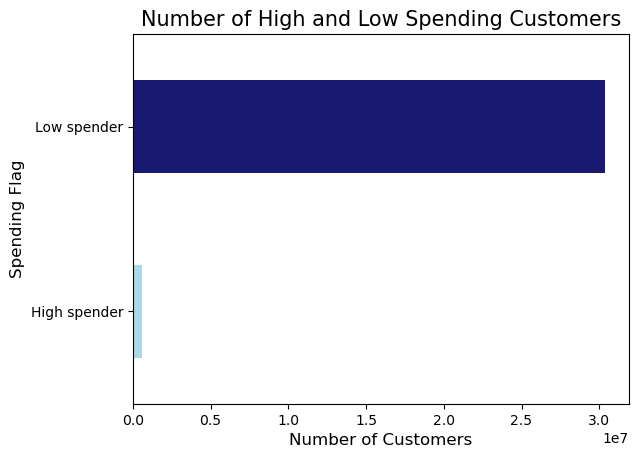

In [75]:
bar_spendingflag = df_active_customers['Spending_Flag'].value_counts().sort_values( ).plot.barh(color = ['lightblue','midnightblue'])
plt.ylabel('Spending Flag', fontsize=12)
plt.xlabel('Number of Customers', fontsize=12) 
plt.title('Number of High and Low Spending Customers', fontsize=15)

Text(0.5, 1.0, '# of High Spending Customers by Age Group')

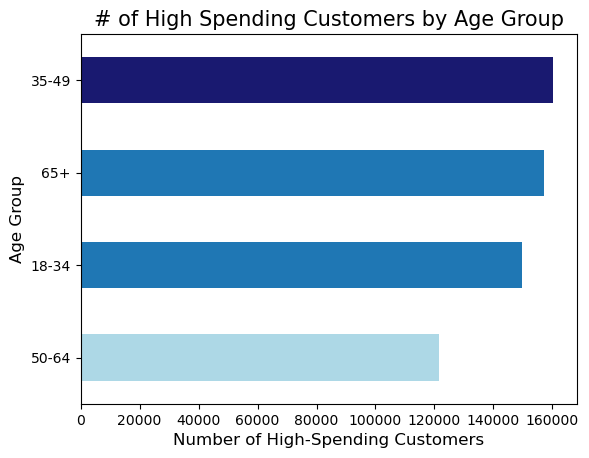

In [76]:
bar_age_highspenders = df_highspenders['age_group'].value_counts().sort_values( ).plot.barh(color = ['lightblue', 'tab:blue', 'tab:blue','midnightblue'])
plt.ylabel('Age Group', fontsize=12)
plt.xlabel('Number of High-Spending Customers', fontsize=12) 
plt.title('# of High Spending Customers by Age Group', fontsize=15)

##### 2.1a Insights:

The age range of 65+ and 18-34 have the most customers. A vast majority of customers are low spenders. However, the 35-49 group has the highest number of high spenders (which is disproportionate to the overall number of customers of this age group) 

#### 2.1b: Frequency Flag by Age Group

In [20]:
crosstab_age_frequencyflag = pd.crosstab(df_active_customers['age_group'], df_active_customers['Frequency_Flag'], dropna = False)

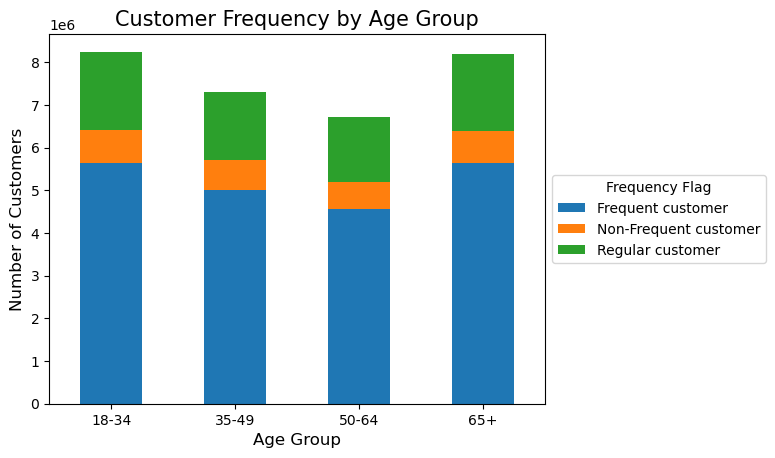

In [21]:
stackedbar_age_frequencyflag = crosstab_age_frequencyflag.plot(kind="bar", stacked=True, rot=0)
plt.ylabel('Number of Customers', fontsize=12)
plt.xlabel('Age Group', fontsize=12) 
plt.title('Customer Frequency by Age Group', fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title = 'Frequency Flag')

In [22]:
crosstab_age_frequencyflag

Frequency_Flag,Frequent customer,Non-Frequent customer,Regular customer
age_group,,,
18-34,5639426,767846,1842525
35-49,5019318,684047,1609063
50-64,4568354,638622,1515486
65+,5635273,760331,1807142


#### 2.1b insights
No insights. 

#### 2.1c: Loyalty Flag by Age Group

In [57]:
crosstab_age_loyaltyflag = pd.crosstab(df_active_customers['age_group'], df_active_customers['loyalty_flag'], dropna = False)

In [58]:
crosstab_age_loyaltyflag

loyalty_flag,Loyal customer,New customer,Regular customer
age_group,,,
18-34,2718207,1282700,4248890
35-49,2438455,1111753,3762220
50-64,2236234,1057706,3428522
65+,2726172,1277780,4198794


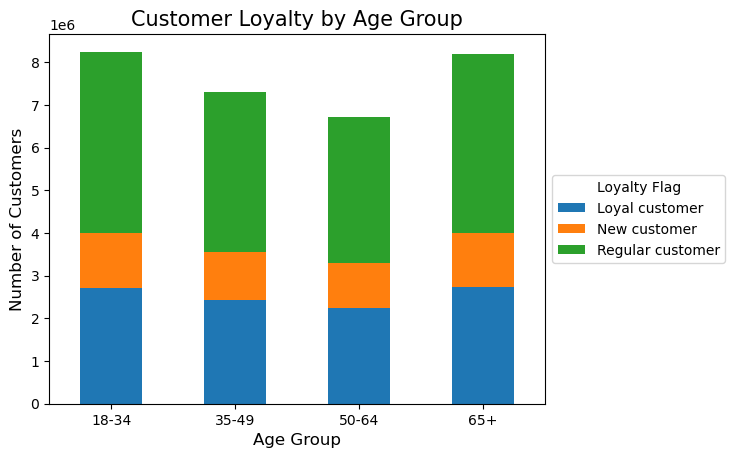

In [59]:
stackedbar_age_loyaltyflag = crosstab_age_loyaltyflag.plot(kind="bar", stacked=True, rot=0)
plt.ylabel('Number of Customers', fontsize=12)
plt.xlabel('Age Group', fontsize=12) 
plt.title('Customer Loyalty by Age Group', fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title = 'Loyalty Flag')

#### 2.1c Insights
No insights

#### 2.1d: Family Status by Age Group

In [30]:
crosstab_age_familystatus = pd.crosstab(df_active_customers['age_group'], df_active_customers['fam_status'], dropna = False)

In [31]:
crosstab_age_familystatus

fam_status,divorced/widowed,living with parents and siblings,married,single
age_group,,,,
18-34,0,1482611,4701670,2065516
35-49,0,0,5500204,1812224
50-64,489924,0,5011007,1221531
65+,2023913,0,6178833,0


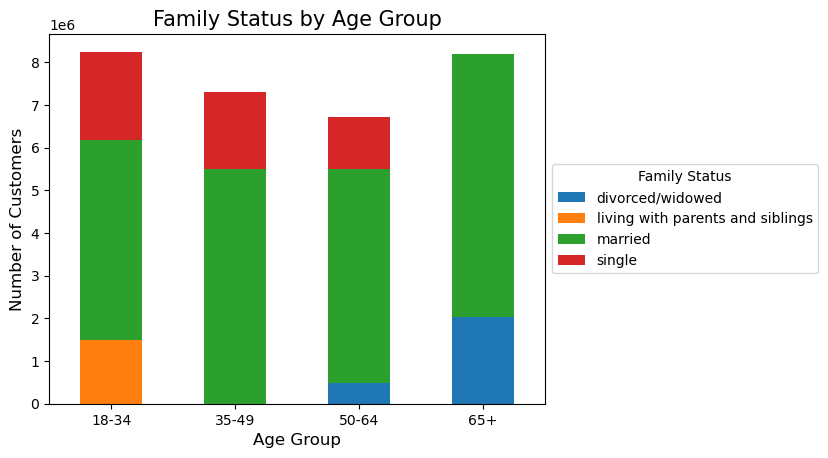

In [32]:
stackedbar_age_familystatus = crosstab_age_familystatus.plot(kind="bar", stacked=True, rot=0)
plt.ylabel('Number of Customers', fontsize=12)
plt.xlabel('Age Group', fontsize=12) 
plt.title('Family Status by Age Group', fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title = 'Family Status')

##### Insights
18-34 and 65+ are largest age groups

18-34: Only Age Group to have people living at home with parents/siblings; least likely to be married; and most likely to be single

65+: most likely to be divorced/widowed (followed by 50-64 and none for 18-34 or 35-49); none or single or live with siblings/parents

These insights may be useful later on when making crosstabs by Family Status - see section 5.5 (not the correct number) of this notebook.

#### 2.1e: Number of Dependants by Age Group

In [29]:
crosstab_age_dependants = pd.crosstab(df_active_customers['age_group'], df_active_customers['n_dependants'], dropna = False)

In [30]:
crosstab_age_dependants

n_dependants,0,1,2,3
age_group,,,,
18-34,2065516,2047633,2063204,2073444
35-49,1812224,1856287,1818050,1825867
50-64,1711455,1672695,1629011,1709301
65+,2023913,2030733,2095786,2052314


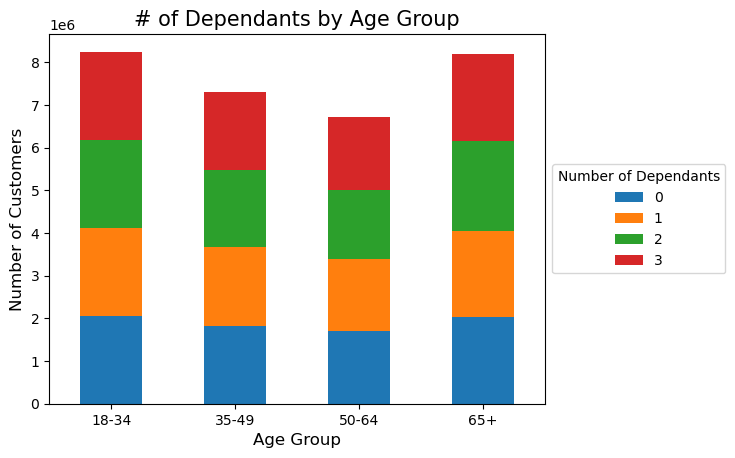

In [31]:
stackedbar_age_dependants = crosstab_age_dependants.plot(kind="bar", stacked=True, rot=0)
plt.ylabel('Number of Customers', fontsize=12)
plt.xlabel('Age Group', fontsize=12) 
plt.title('# of Dependants by Age Group', fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title = 'Number of Dependants')

#### 2.1e Insights

No insights

#### 2.1f: Days of Week by Age Group

In [32]:
crosstab_age_dow = pd.crosstab(df_active_customers['age_group'], df_active_customers['orders_day_of_week'], dropna = False)

In [33]:
crosstab_age_dow

orders_day_of_week,0,1,2,3,4,5,6
age_group,,,,,,,
18-34,1576829,1458575,1065590,972246,969577,1074899,1132081
35-49,1395956,1273813,951080,867439,856970,952930,1014240
50-64,1278638,1177872,878339,792740,786124,876759,931990
65+,1567640,1418821,1066123,979184,956988,1067032,1146958


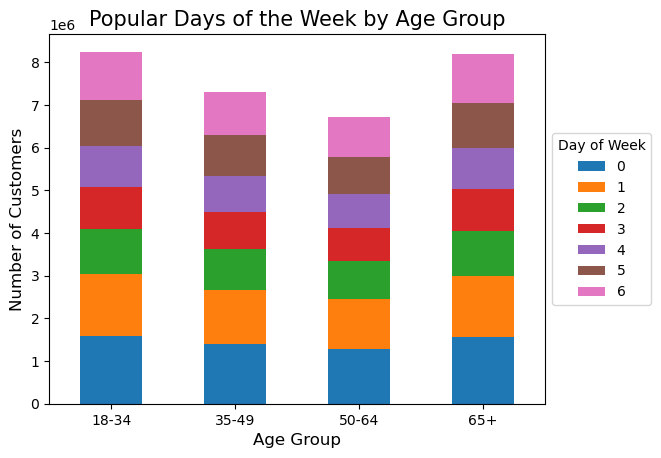

In [34]:
stackedbar_age_dow = crosstab_age_dow.plot(kind="bar", stacked=True, rot=0)
plt.ylabel('Number of Customers', fontsize=12)
plt.xlabel('Age Group', fontsize=12) 
plt.title('Popular Days of the Week by Age Group', fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title = 'Day of Week')

#### 2.1f Insights
No insights

#### 2.1g: Mean Prices by Age Group

In [86]:
df_active_customers.groupby('prices')

In [64]:
df_active_customers.groupby('age_group').agg({'prices': ['mean']})

,prices
,mean
age_group,
18-34,7.789715
35-49,7.798154
50-64,7.793944
65+,7.801371


#### 2.1g: Insights
All age groups have very similar mean amounts spent

### 2.2 Customers by Loyalty Status

In [45]:
df_active_customers['loyalty_flag'].value_counts(dropna = False)

loyalty_flag
Regular customer    15891077
Loyal customer      10293737
New customer         4807850
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Customers by Loyalty')

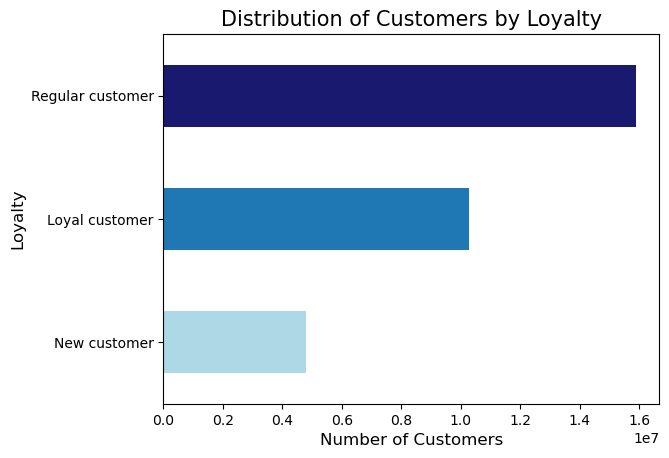

In [46]:
#visualization
bar_loyalty_flag = df_active_customers['loyalty_flag'].value_counts().sort_values( ).plot.barh(color = ['lightblue', 'tab:blue', 'midnightblue','midnightblue'])
plt.xlabel('Number of Customers', fontsize=12)
plt.ylabel('Loyalty', fontsize=12)
plt.title('Distribution of Customers by Loyalty', fontsize=15)

Vast majority of customers are regular customers (between 10-40 orders), followed by loyal customers (40+ orders). New customers (<10 orders) are the least common.

#### 2.2a. Spending Flag by Loyalty

In [47]:
crosstab_loyalty_spendingflag = pd.crosstab(df_active_customers['loyalty_flag'], df_active_customers['Spending_Flag'], dropna = False)

In [48]:
crosstab_loyalty_spendingflag

Spending_Flag,High spender,Low spender
loyalty_flag,,
Loyal customer,217155,10076582
New customer,84322,4723528
Regular customer,303107,15587970


Text(0.5, 1.0, 'Number of High and Low Spenders by Loyalty')

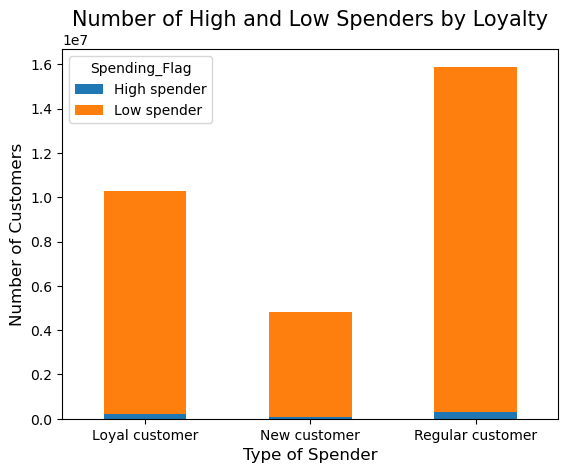

In [49]:
stackedbar_loyalty_spendingflag = crosstab_loyalty_spendingflag.plot(kind="bar", stacked=True, rot=0)
plt.ylabel('Number of Customers', fontsize=12)
plt.xlabel('Type of Spender', fontsize=12) 
plt.title('Number of High and Low Spenders by Loyalty', fontsize=15)

Vast majority of customers are low spenders

In [25]:
df_highspenders['loyalty_flag'].value_counts()

loyalty_flag
Regular customer    303107
Loyal customer      217155
New customer         84322
Name: count, dtype: int64

Text(0.5, 1.0, '# of High Spending Customers by Age Group')

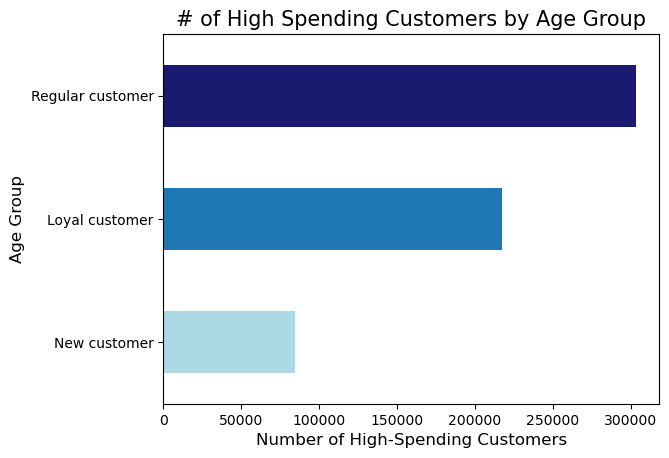

In [26]:
bar_loyalty_highspenders = df_highspenders['loyalty_flag'].value_counts().sort_values( ).plot.barh(color = ['lightblue', 'tab:blue','midnightblue'])
plt.ylabel('Age Group', fontsize=12)
plt.xlabel('Number of High-Spending Customers', fontsize=12) 
plt.title('# of High Spending Customers by Age Group', fontsize=15)

#### 2.2a Insights
No insights; number of high spenders is proportionate to # of customers in loyalty group.

#### 2.2b. Frequency Flag by Customer Loyalty

In [50]:
crosstab_loyalty_frequencyflag = pd.crosstab(df_active_customers['loyalty_flag'], df_active_customers['Frequency_Flag'], dropna = False)

In [51]:
crosstab_loyalty_frequencyflag

Frequency_Flag,Frequent customer,Non-Frequent customer,Regular customer
loyalty_flag,,,
Loyal customer,10289604,0,4133
New customer,1294218,1985208,1528424
Regular customer,9638086,912235,5340756


Text(0.5, 1.0, 'Number of High and Low Spenders by Loyalty')

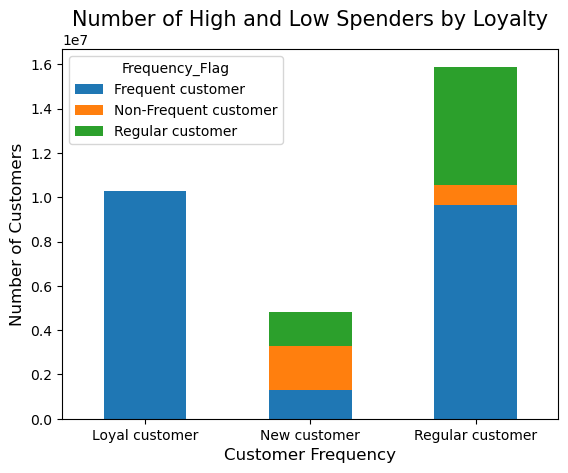

In [52]:
stackedbar_loyalty_frequencyflag = crosstab_loyalty_frequencyflag.plot(kind="bar", stacked=True, rot=0)
plt.ylabel('Number of Customers', fontsize=12)
plt.xlabel('Customer Frequency', fontsize=12) 
plt.title('Number of High and Low Spenders by Loyalty', fontsize=15)

#### 2.2b insights
This graph is very intuitive and a given. No real insights here

#### 2.2c: Prices by Loyalty

In [42]:
df_active_customers.groupby('prices')

In [41]:
df_active_customers.groupby('loyalty_flag').agg({'prices': ['mean']})

,prices
,mean
loyalty_flag,
Loyal customer,7.778434
New customer,7.806110
Regular customer,7.802976


##### 2.2c Insights
All three loyalty groups spend roughly the same per item on average. Loyal customers spend slightly less than the other two groups

#### 2.2d Family Status by Loyalty Status

In [33]:
crosstab_loyalty_familystatus = pd.crosstab(df_active_customers['loyalty_flag'], df_active_customers['fam_status'], dropna = False)

In [34]:
crosstab_loyalty_familystatus

fam_status,divorced/widowed,living with parents and siblings,married,single
loyalty_flag,,,,
Loyal customer,883487,493265,7208852,1708133
New customer,404149,221968,3383546,798187
Regular customer,1360125,767378,11170623,2592951


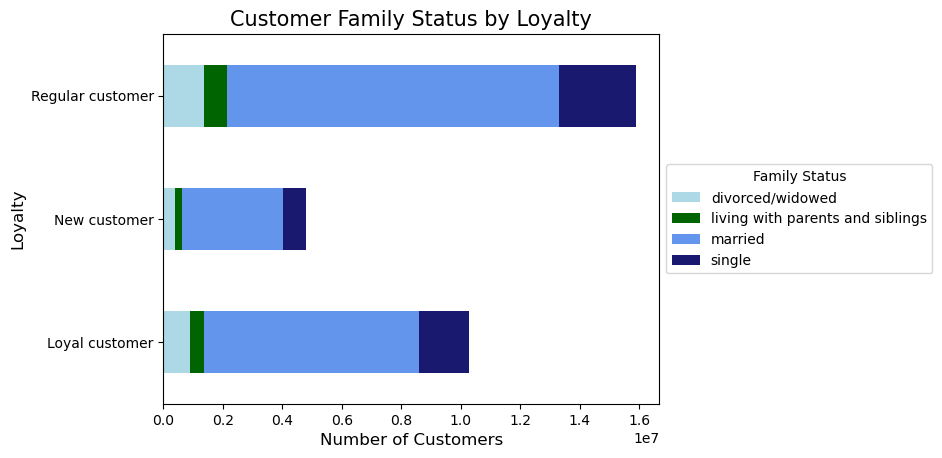

In [38]:
stackedbar_loyalty_familystatus = crosstab_loyalty_familystatus.plot(kind="barh", color = ['lightblue','darkgreen','cornflowerblue','midnightblue'], stacked=True, rot=0)
plt.ylabel('Loyalty', fontsize=12)
plt.xlabel('Number of Customers', fontsize=12) 
plt.title('Customer Family Status by Loyalty', fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title = 'Family Status')

##### 2.2d Insights
No insights

#### 2.2e Number of Dependants by Loyalty Status

In [39]:
crosstab_loyalty_dependants = pd.crosstab(df_active_customers['loyalty_flag'], df_active_customers['n_dependants'], dropna = False)

In [40]:
crosstab_loyalty_dependants

n_dependants,0,1,2,3
loyalty_flag,,,,
Loyal customer,2591620,2561207,2556019,2584891
New customer,1202336,1210938,1196993,1197583
Regular customer,3953076,3953836,3987187,3996978


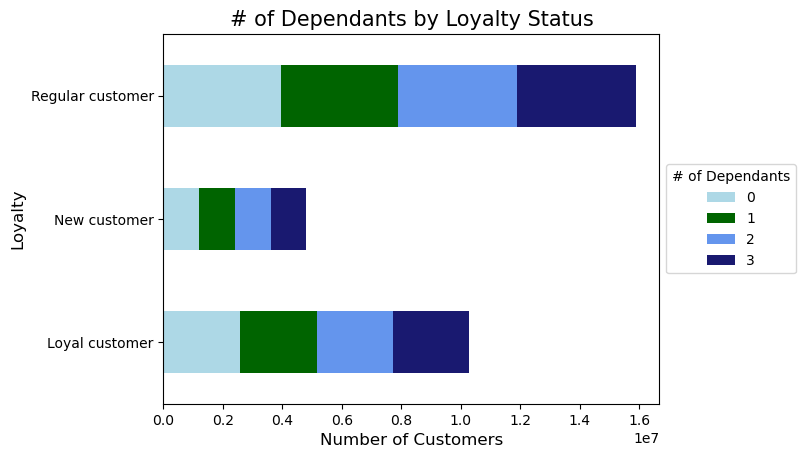

In [41]:
stackedbar_loyalty_familystatus = crosstab_loyalty_dependants.plot(kind="barh", color = ['lightblue','darkgreen','cornflowerblue','midnightblue'], stacked=True, rot=0)
plt.ylabel('Loyalty', fontsize=12)
plt.xlabel('Number of Customers', fontsize=12) 
plt.title('# of Dependants by Loyalty Status', fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title = '# of Dependants')

##### 2.2e Insights
No Insights

### 2.3 Profile based on income

In [73]:
#Describing distribution of income
df_active_customers['income'].describe()

count    3.099266e+07
mean     9.967322e+04
std      4.313928e+04
min      2.590300e+04
25%      6.728900e+04
50%      9.676500e+04
75%      1.281010e+05
max      5.939010e+05
Name: income, dtype: float64

1st quartile = 67.3k; Median = 96.8k; 3rd quartile = 128.1k --> I will create the following flags for 'income_flag'

65k and under = low-income

65k-130k = middle-income

130k and up = high-income



#### Flags for Income Level: 
The next three cells flagging for each income level need to be run before subsetting for any of these income groups (in Section 1.1)

In [16]:
#flag for high-income
df_active_customers.loc[(df_active_customers['income'] >130000), 'income_flag'] = 'high-income'

In [17]:
#flag for low-income
df_active_customers.loc[(df_active_customers['income'] <65000), 'income_flag'] = 'low-income'

In [18]:
#flag for middle-income
df_active_customers.loc[(df_active_customers['income'] >=65000) & (df_active_customers['income'] <=130000), 'income_flag'] = 'middle-income'

In [8]:
df_active_customers['income_flag'].value_counts()

income_flag
middle-income    16470561
high-income       7407841
low-income        7114262
Name: count, dtype: int64

Text(0.5, 1.0, 'Number of Customers by Income Level')

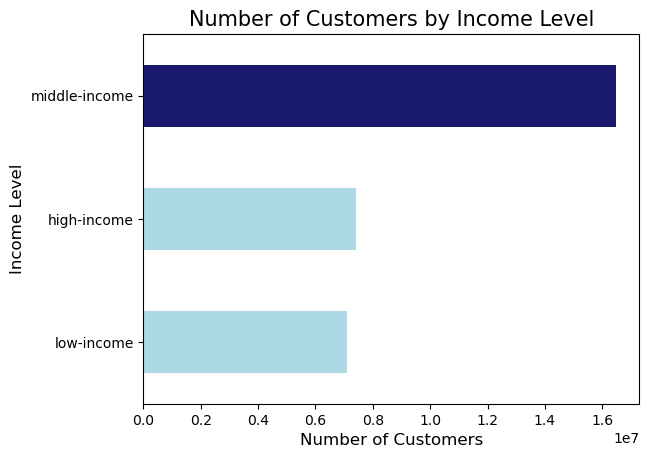

In [78]:
#visualization
bar_income = df_active_customers['income_flag'].value_counts().sort_values( ).plot.barh(color = ['lightblue', 'lightblue', 'midnightblue'])
plt.ylabel('Income Level', fontsize=12)
plt.xlabel('Number of Customers', fontsize=12) 
plt.title('Number of Customers by Income Level', fontsize=15)

#### 2.3a: Spending Habits by Income Group

In [44]:
#By Income Level/Spending Habits
crosstab_incomeflag_spendingflag = pd.crosstab(df_active_customers['income_flag'], df_active_customers['Spending_Flag'], dropna = False)

In [45]:
crosstab_incomeflag_spendingflag

Spending_Flag,High spender,Low spender
income_flag,,
high-income,443409,6964432
low-income,18460,7095802
middle-income,142715,16327846


Text(0.5, 1.0, 'Customer Spending Habits by Income Level')

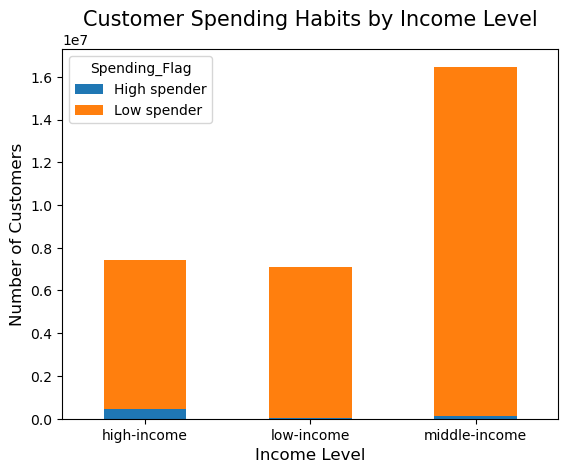

In [46]:
#stacked bar incomeflag_spendingflag
stackedbar_incomeflag_spendingflag = crosstab_incomeflag_spendingflag.plot(kind="bar", stacked=True, rot=0)
plt.ylabel('Number of Customers', fontsize=12)
plt.xlabel('Income Level', fontsize=12) 
plt.title('Customer Spending Habits by Income Level', fontsize=15)

##### High Spenders Only

Text(0.5, 1.0, '# of High Spending Customers by Level of Income')

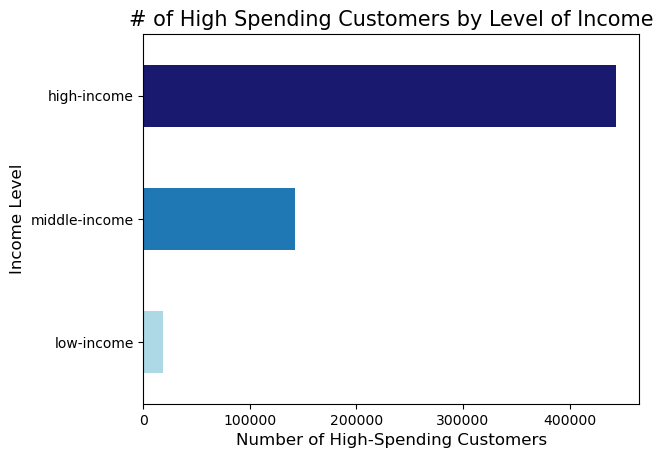

In [12]:
bar_income_highspenders = df_highspenders['income_flag'].value_counts().sort_values( ).plot.barh(color = ['lightblue', 'tab:blue','midnightblue'])
plt.ylabel('Income Level', fontsize=12)
plt.xlabel('Number of High-Spending Customers', fontsize=12) 
plt.title('# of High Spending Customers by Level of Income', fontsize=15)

#### 2.3a Insights
Vast majority of customers are low spenders.

High-income customers make up the vast majority of high-spenders, although there are many more middle-income customers overall. 

#### 2.3b: Frequency Flag by income level

In [13]:
crosstab_income_frequencyflag = pd.crosstab(df_active_customers['income_flag'], df_active_customers['Frequency_Flag'], dropna = False)

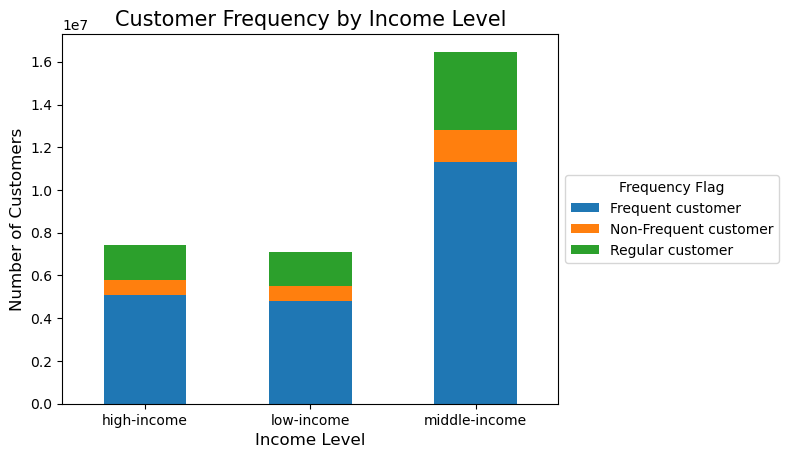

In [14]:
stackedbar_income_frequencyflag = crosstab_income_frequencyflag.plot(kind="bar", stacked=True, rot=0)
plt.ylabel('Number of Customers', fontsize=12)
plt.xlabel('Income Level', fontsize=12) 
plt.title('Customer Frequency by Income Level', fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title = 'Frequency Flag')

#### CREATING A DF WITHOUT MIDDLE-INCOME MAJORITY

In [46]:
#filter out middle income
df_highlowincome = df_active_customers[df_active_customers['income_flag']!='middle-income']

In [52]:
crosstab_highlowincome_frequencyflag = pd.crosstab(df_highlowincome['income_flag'], df_active_customers['Frequency_Flag'], dropna = False)

In [53]:
crosstab_highlowincome_frequencyflag

Frequency_Flag,Frequent customer,Non-Frequent customer,Regular customer
income_flag,,,
high-income,5105951,665586,1636304
low-income,4788647,734997,1590618


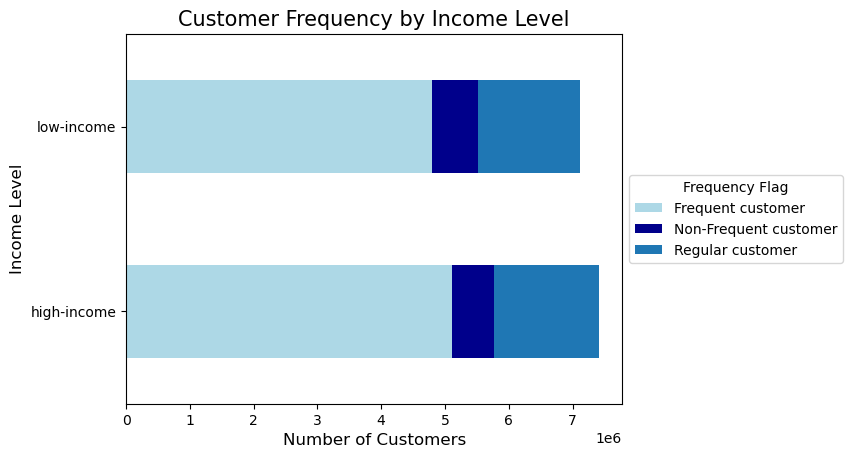

In [56]:
#Same graph as above without middle-income
stackedbar_highlowincome_frequencyflag = crosstab_highlowincome_frequencyflag.plot(kind="barh", color = ['lightblue','darkblue','tab:blue'], stacked=True, rot=0)

plt.ylabel('Income Level', fontsize=12)
plt.xlabel('Number of Customers', fontsize=12) 
plt.title('Customer Frequency by Income Level', fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title = 'Frequency Flag')

#### 2.3b Insights
No Insights

#### 2.3c Loyalty by Income Level

In [45]:
#create crosstabs
crosstab_highlowincome_loyaltyflag = pd.crosstab(df_highlowincome['income_flag'], df_highlowincome['loyalty_flag'], dropna = False)

In [49]:
crosstab_income_loyaltyflag = pd.crosstab(df_active_customers['income_flag'], df_active_customers['loyalty_flag'], dropna = False)

In [48]:
#check outputs
crosstab_income_loyaltyflag

loyalty_flag,Loyal customer,New customer,Regular customer
income_flag,,,
high-income,2467979,1121984,3817878
low-income,2290365,1215532,3608365
middle-income,5535393,2470334,8464834


In [50]:
crosstab_highlowincome_loyaltyflag

loyalty_flag,Loyal customer,New customer,Regular customer
income_flag,,,
high-income,2467979,1121984,3817878
low-income,2290365,1215532,3608365


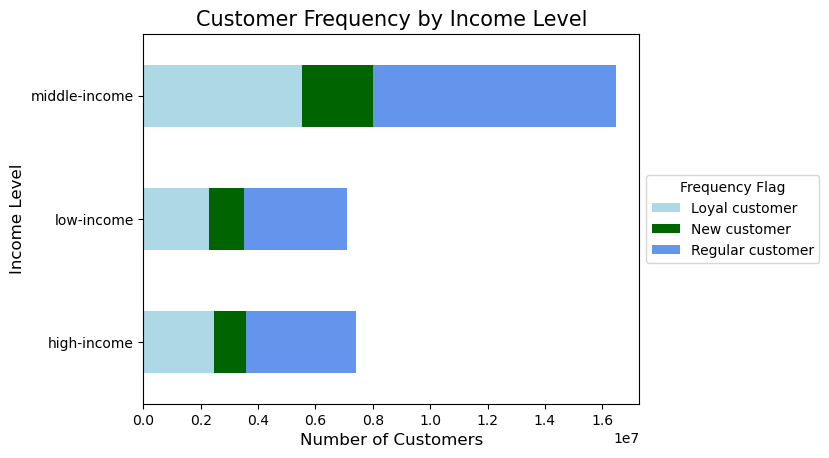

In [177]:
stackedbar_income_loyaltyflag = crosstab_income_loyaltyflag.plot(kind="barh", color = ['lightblue','darkgreen','cornflowerblue'], stacked=True, rot=0)
plt.ylabel('Income Level', fontsize=12)
plt.xlabel('Number of Customers', fontsize=12) 
plt.title('Customer Frequency by Income Level', fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title = 'Frequency Flag')

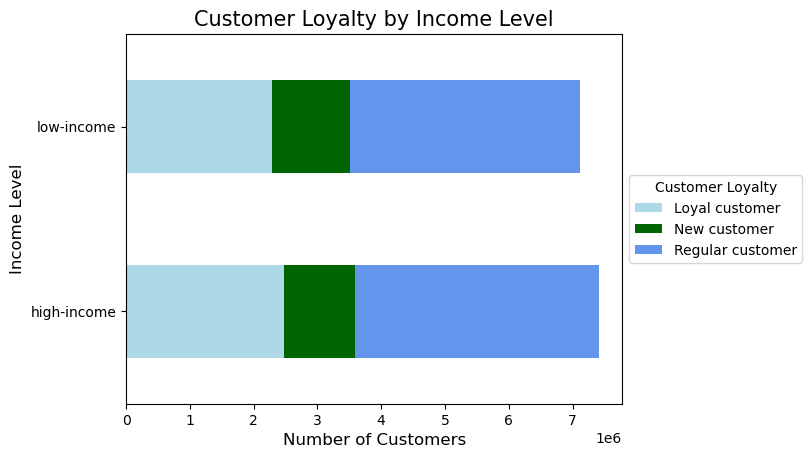

In [58]:
#Same graph as above without middle-income
stackedbar_highlowincome_loyaltyflag = crosstab_highlowincome_loyaltyflag.plot(kind="barh", color = ['lightblue','darkgreen','cornflowerblue'], stacked=True, rot=0)

plt.ylabel('Income Level', fontsize=12)
plt.xlabel('Number of Customers', fontsize=12) 
plt.title('Customer Loyalty by Income Level', fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title = 'Customer Loyalty')

#### 2.3d Family Status by Income Level

In [61]:
crosstab_income_familystatus = pd.crosstab(df_active_customers['income_flag'], df_active_customers['fam_status'], dropna = False)

In [62]:
crosstab_income_familystatus

fam_status,divorced/widowed,living with parents and siblings,married,single
income_flag,,,,
high-income,976861,17709,5513048,900223
low-income,311473,604658,4731324,1466807
middle-income,1359427,860244,11518649,2732241


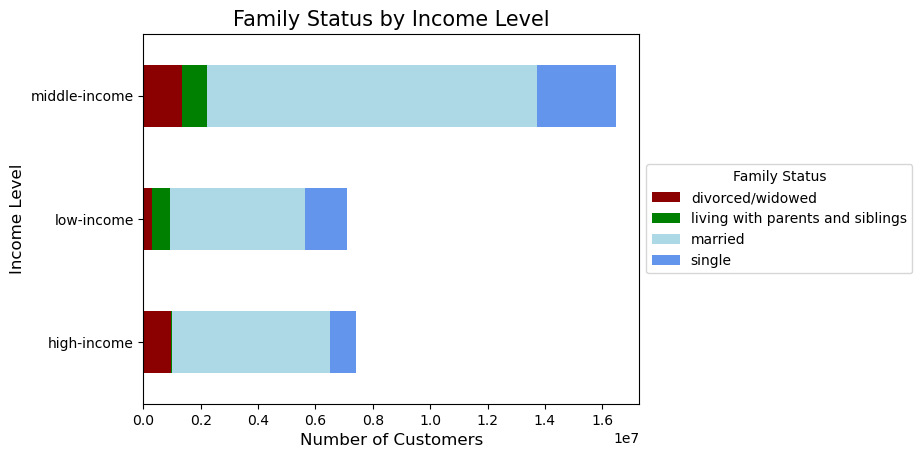

In [115]:
stackedbar_income_familystatus = crosstab_income_familystatus.plot(kind="barh", color = ['darkred','green','lightblue','cornflowerblue'], stacked=True, rot=0)
plt.ylabel('Income Level', fontsize=12)
plt.xlabel('Number of Customers', fontsize=12) 
plt.title('Family Status by Income Level', fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title = 'Family Status')

#### 2.3d Insights
High-income customers have lowest proportions of "single" and "living with parents and siblings" categories; they have highest proportions of "widowed" category

Low-income customers have lowerst proportions in the "widowed category"; they have highest proportions of "single" and "living with parents and siblings" categories

#### 2.3e: # of Dependants and Income Level

In [78]:
crosstab_income_dependants = pd.crosstab(df_active_customers['income_flag'], df_active_customers['n_dependants'], dropna = False)

In [79]:
crosstab_income_dependants

n_dependants,0,1,2,3
income_flag,,,,
high-income,1877084,1825049,1843149,1862559
low-income,1778280,1778477,1775355,1782150
middle-income,4091668,4122455,4121695,4134743


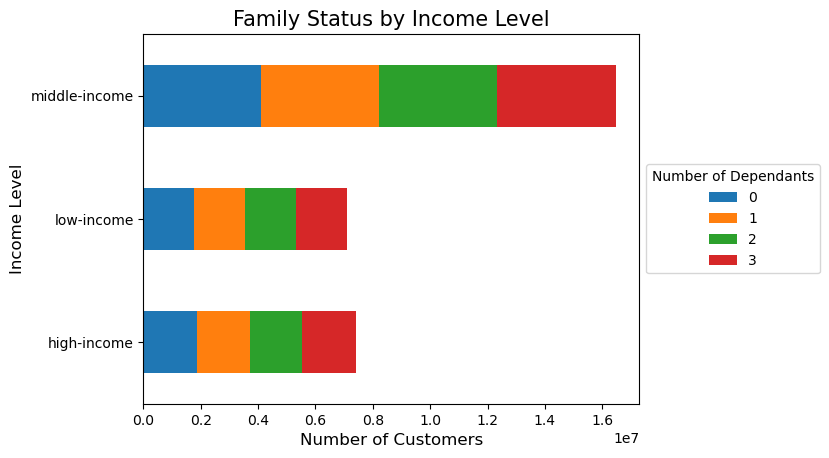

In [87]:
stackedbar_income_dependants = crosstab_income_dependants.plot(kind="barh", stacked=True, rot=0)
plt.ylabel('Income Level', fontsize=12)
plt.xlabel('Number of Customers', fontsize=12) 
plt.title('Family Status by Income Level', fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title = 'Number of Dependants')

#### 2.3e: Insights
No insights

### 2.3f Income by Age Group

In [32]:
crosstab_income_age = pd.crosstab(df_active_customers['income_flag'], df_active_customers['age_group'], dropna = False)

In [33]:
crosstab_income_age

age_group,18-34,35-49,50-64,65+
income_flag,,,,
high-income,92596,1664480,2452908,3005158
low-income,3477586,1733051,837740,996861
middle-income,4679615,3914897,3431814,4200727


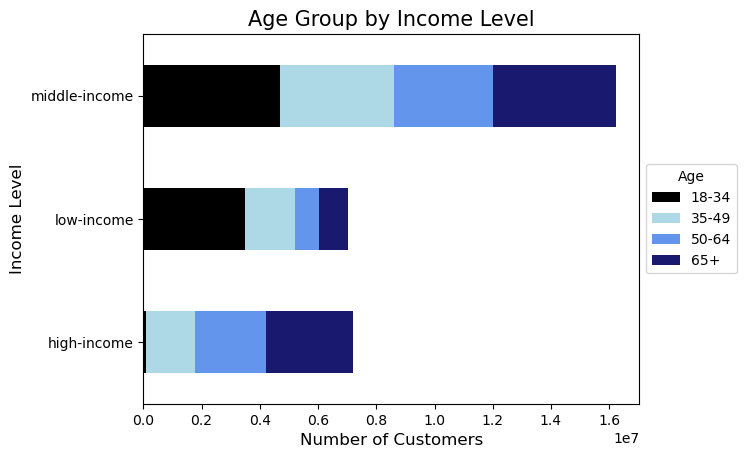

In [37]:
stackedbar_income_age = crosstab_income_age.sort_values(by='18-34', ascending= True).plot(kind='barh', stacked=True, color = ['black','lightblue', 'cornflowerblue', 'midnightblue'])
plt.ylabel('Income Level', fontsize=12)
plt.xlabel('Number of Customers', fontsize=12) 
plt.title('Age Group by Income Level', fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title = 'Age')

### 2.4 Profiles based on Family Status

In [89]:
#Value Counts Family Status
df_active_customers['fam_status'].value_counts()

fam_status
married                             21763021
single                               5099271
divorced/widowed                     2647761
living with parents and siblings     1482611
Name: count, dtype: int64

Text(0.5, 1.0, 'Number of Customers by Family Status')

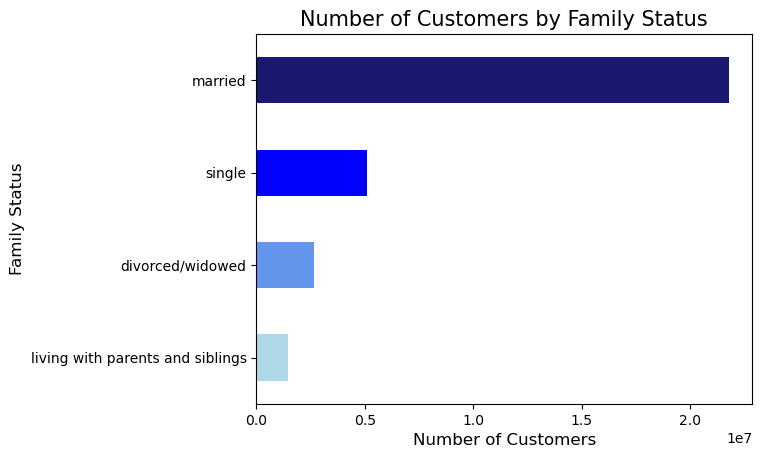

In [162]:
#visualization
bar_family_status = df_active_customers['fam_status'].value_counts().sort_values( ).plot.barh(color = ['lightblue', 'cornflowerblue', 'blue','midnightblue'])
plt.ylabel('Family Status', fontsize=12)
plt.xlabel('Number of Customers', fontsize=12) 
plt.title('Number of Customers by Family Status', fontsize=15)

#### Initial Insights

By far, the largest group of customers are married.


#### 2.4a Income Levels of Each Group by Fam Status

Text(0.5, 1.0, '# of Customers Living with Parents/Siblings by Level of Income')

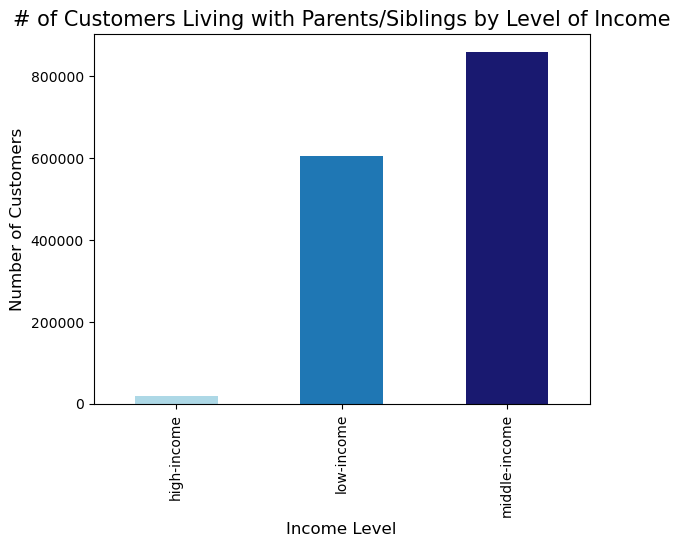

In [37]:
bar_income_livingwithparents = df_livingwithparents['income_flag'].value_counts().sort_values( ).plot.bar(color = ['lightblue', 'tab:blue','midnightblue'])
plt.ylabel('Number of Customers', fontsize=12)
plt.xlabel('Income Level', fontsize=12) 
plt.title('# of Customers Living with Parents/Siblings by Level of Income', fontsize=15)

Text(0.5, 1.0, '# of Divorced/Widowed Customers by Level of Income')

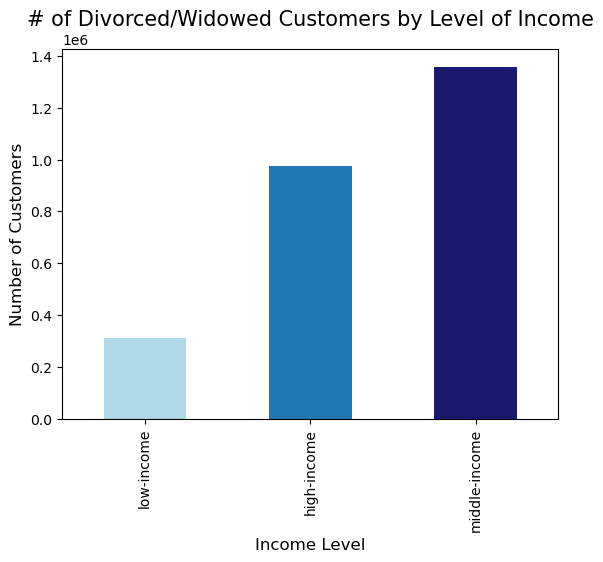

In [38]:
bar_income_divorced_widowed = df_divorced_widowed['income_flag'].value_counts().sort_values( ).plot.bar(color = ['lightblue', 'tab:blue','midnightblue'])
plt.ylabel('Number of Customers', fontsize=12)
plt.xlabel('Income Level', fontsize=12) 
plt.title('# of Divorced/Widowed Customers by Level of Income', fontsize=15)

Text(0.5, 1.0, '# of Married Customers by Level of Income')

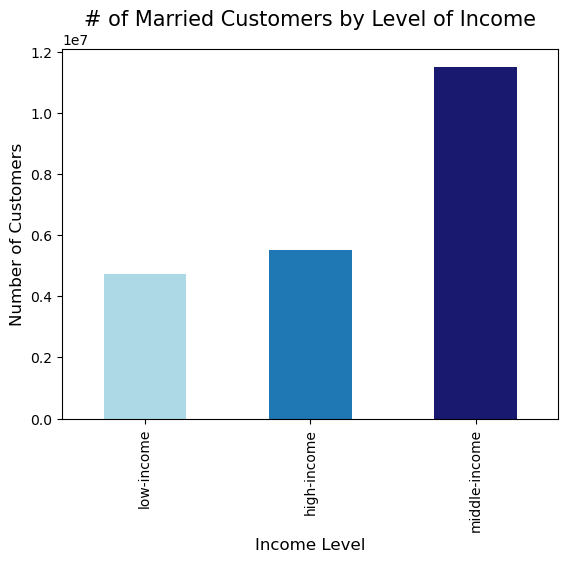

In [39]:
bar_income_married = df_married['income_flag'].value_counts().sort_values( ).plot.bar(color = ['lightblue', 'tab:blue','midnightblue'])
plt.ylabel('Number of Customers', fontsize=12)
plt.xlabel('Income Level', fontsize=12) 
plt.title('# of Married Customers by Level of Income', fontsize=15)

Text(0.5, 1.0, '# of Single Customers by Level of Income')

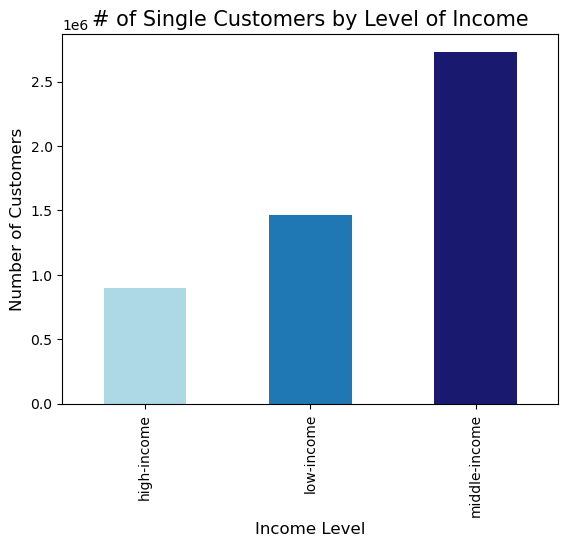

In [40]:
bar_income_single = df_single['income_flag'].value_counts().sort_values( ).plot.bar(color = ['lightblue', 'tab:blue','midnightblue'])
plt.ylabel('Number of Customers', fontsize=12)
plt.xlabel('Income Level', fontsize=12) 
plt.title('# of Single Customers by Level of Income', fontsize=15)

#### 2.4a Insights: 
As mentioned before, low-income customers account for a disproportionately high number in the category "living with parents and siblings". High-income customers also account for a disproportionately high number in the "divorced/widowed" category). Additionally, single customers have more low-income than high-income customers and married customers have more high-income than low-income customers.

As high-income customers account for highest quantity of high-spenders, groups by family status with high proportions of high-income may be more likely to be high spenders as well. I only recommend advertising high-range products to married or divorced/widowed customers (preferably to those who are high or middle income).

#### 2.4b: Family Status by Age Group (Cleaned up version of earlier graph in this notebook)

In [23]:
crosstab_familystatus_age = pd.crosstab(df_active_customers['fam_status'], df_active_customers['age_group'], dropna = False)

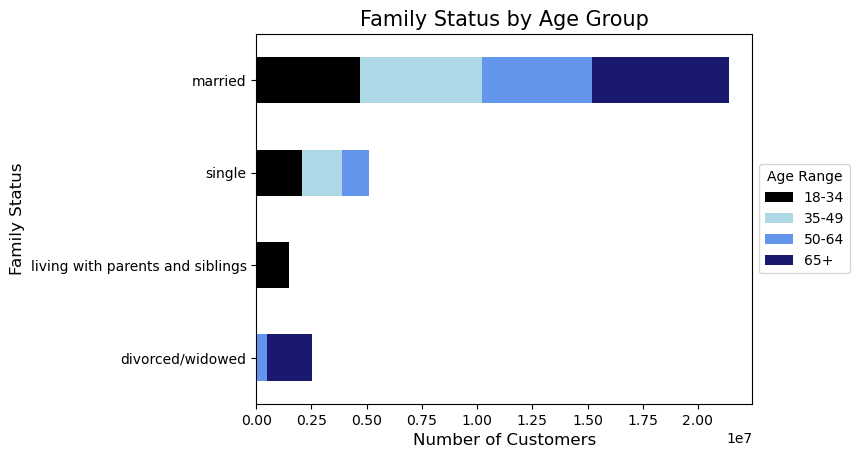

In [30]:
stackedbar_familystatus_age = crosstab_familystatus_age.sort_values(by='18-34', ascending= True).plot(kind='barh', stacked=True, color = ['black','lightblue', 'cornflowerblue', 'midnightblue'])
plt.ylabel('Family Status', fontsize=12)
plt.xlabel('Number of Customers', fontsize=12) 
plt.title('Family Status by Age Group', fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title = 'Age Range')

#### 2.4b Insights: 

RE 18-34 Age Range: Accounts for about half of low-income customers; VERY few high-income customers in this range

There are also fewer low-income customers aged 50 and over

In [ ]:
#stacked bar for living with parents and siblings
stackedbar_livingwithparents_loyaltyflag = df_livingwithparents(kind="bar", stacked=True, rot=0)
plt.ylabel('Number of Customers', fontsize=12)
plt.xlabel('Income Level', fontsize=12) 
plt.title('Customer Frequency by Income Level', fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title = 'Frequency Flag')

#### 2.4c: Family Status and Spending Flag

In [146]:
crosstab_familystatus_spendingflag = pd.crosstab(df_active_customers['fam_status'], df_active_customers['Spending_Flag'], dropna = False)

In [147]:
crosstab_familystatus_spendingflag

Spending_Flag,High spender,Low spender
fam_status,,
divorced/widowed,50381,2597380
living with parents and siblings,27970,1454641
married,430128,21332893
single,96105,5003166


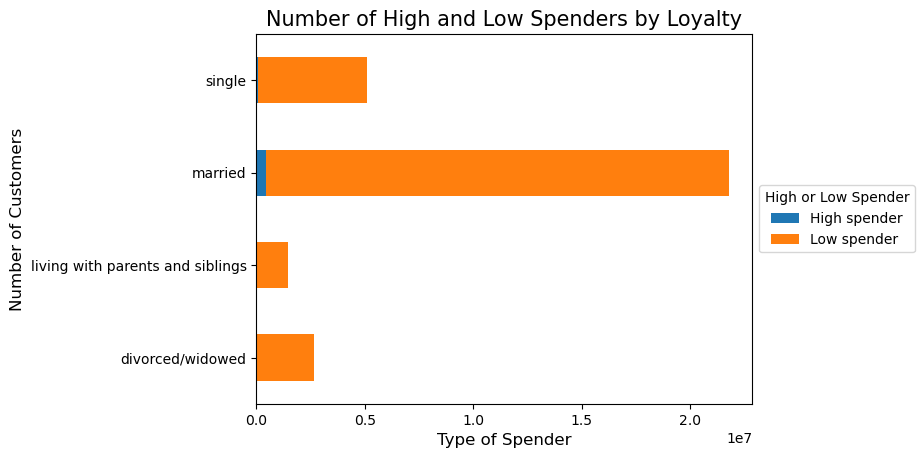

In [150]:
stackedbar_familystatus_spendingflag = crosstab_familystatus_spendingflag.plot(kind="barh", stacked=True, rot=0)
plt.ylabel('Number of Customers', fontsize=12)
plt.xlabel('Type of Spender', fontsize=12) 
plt.title('Number of High and Low Spenders by Loyalty', fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title = 'High or Low Spender')

No real insights here; let's try focusing on high spenders

Text(0.5, 1.0, '# of High Spending Customers by Family Status')

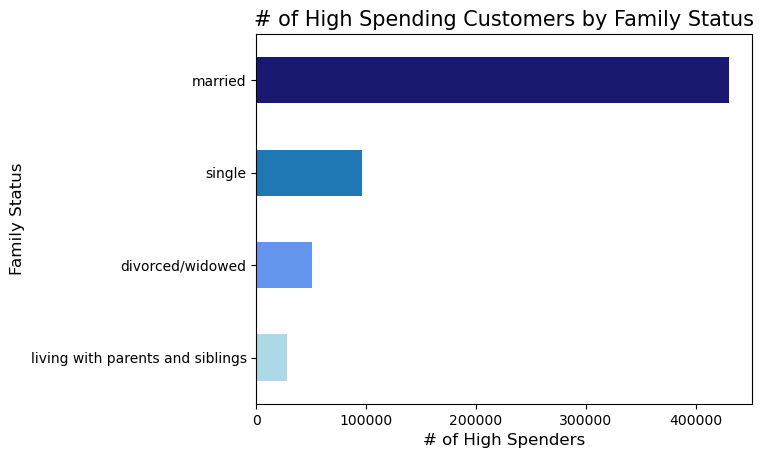

In [159]:
#Same Graph, focusing on high spenders
bar_highspenders_famstatus = df_highspenders['fam_status'].value_counts().sort_values( ).plot.barh(color = ['lightblue', 'cornflowerblue','tab:blue','midnightblue'])
plt.ylabel('Family Status', fontsize=12)
plt.xlabel('# of High Spenders', fontsize=12) 
plt.title('# of High Spending Customers by Family Status', fontsize=15)

#### 2.4c Insights
Married customers by far make up the highest number of high spenders.

#### 2.4d Mean Prices by Family Status

In [43]:
df_active_customers.groupby('fam_status').agg({'prices': ['mean']})

,prices
,mean
fam_status,
divorced/widowed,7.805999
living with parents and siblings,7.805819
married,7.794894
single,7.788485


##### 2.4d Insights
No Insights

### 2.5: Number of Dependants

In [39]:
df_active_customers['n_dependants'].value_counts()

n_dependants
3    7779452
0    7747032
2    7740199
1    7725981
Name: count, dtype: int64

Text(0.5, 1.0, 'Customers by Number of Dependants')

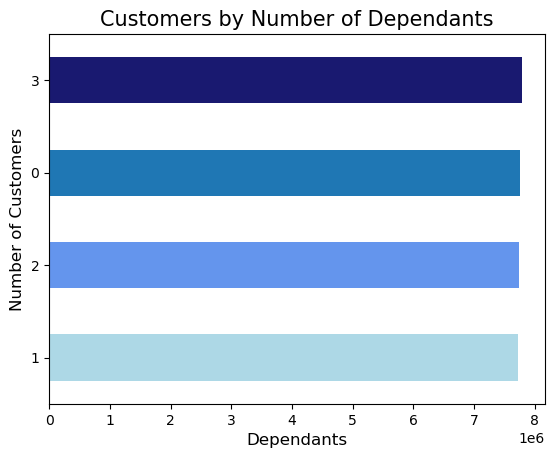

In [42]:
bar_dependants = df_active_customers['n_dependants'].value_counts().sort_values( ).plot.barh(color = ['lightblue', 'cornflowerblue','tab:blue','midnightblue',])
plt.ylabel('Number of Customers', fontsize=12)
plt.xlabel('Dependants', fontsize=12) 
plt.title('Customers by Number of Dependants', fontsize=15)

#### 2.5a: Dependants by Spending Flag

In [43]:
crosstab_dependants_spendingflag = pd.crosstab(df_active_customers['n_dependants'], df_active_customers['Spending_Flag'], dropna = False)

In [44]:
crosstab_dependants_spendingflag

Spending_Flag,High spender,Low spender
n_dependants,,
0,146486,7600546
1,143936,7582045
2,161246,7578953
3,152916,7626536


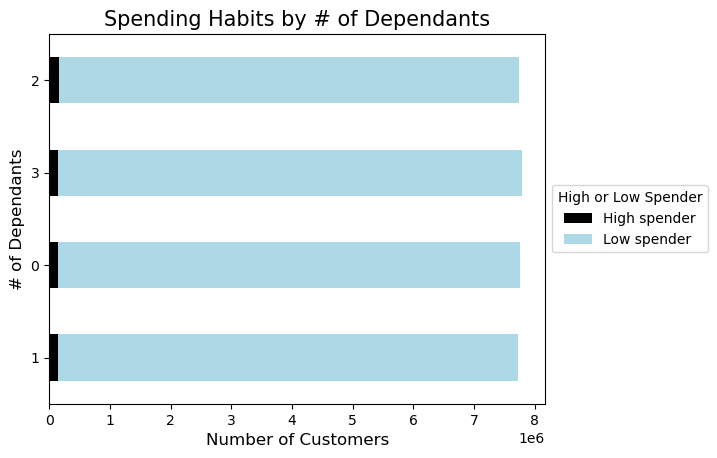

In [45]:
stackedbar_dependants_spendingflag = crosstab_dependants_spendingflag.sort_values(by='High spender', ascending= True).plot(kind='barh', stacked=True, color = ['black','lightblue', 'cornflowerblue', 'midnightblue'])
plt.ylabel('# of Dependants', fontsize=12)
plt.xlabel('Number of Customers', fontsize=12) 
plt.title('Spending Habits by # of Dependants', fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title = 'High or Low Spender')

#### Focusing on high spenders

In [47]:
df_highspenders['n_dependants'].value_counts()

n_dependants
2    161246
3    152916
0    146486
1    143936
Name: count, dtype: int64

Text(0.5, 1.0, 'High Spenders by Number of Dependants')

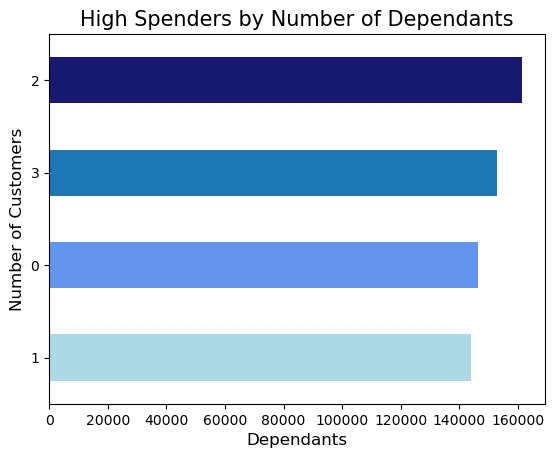

In [49]:
bar_dependants_highspenders = df_highspenders['n_dependants'].value_counts().sort_values( ).plot.barh(color = ['lightblue', 'cornflowerblue','tab:blue','midnightblue',])
plt.ylabel('Number of Customers', fontsize=12)
plt.xlabel('Dependants', fontsize=12) 
plt.title('High Spenders by Number of Dependants', fontsize=15)

##### 2.5a Insights
Those with 2-3 dependants tend do be slightly higher spenders than those with 0-1 dependants.

### 2.6: By Region

In [78]:
df_active_customers['regions'].value_counts()

regions
South        10320462
West          7934427
Midwest       7267707
Northeast     5470068
Name: count, dtype: int64

Text(0.5, 1.0, '# of Customers by Region')

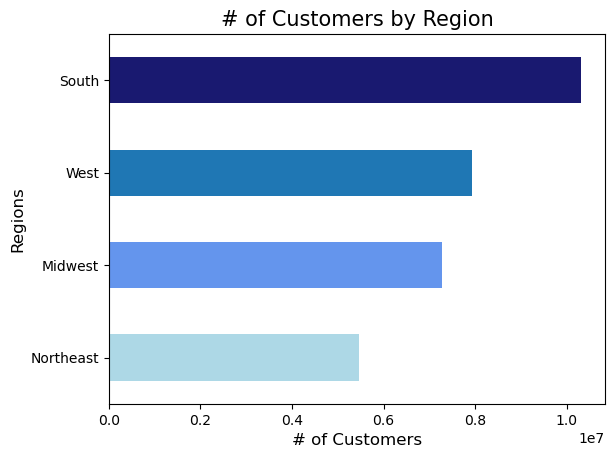

In [80]:
bar_region = df_active_customers['regions'].value_counts().sort_values( ).plot.barh(color = ['lightblue', 'cornflowerblue','tab:blue','midnightblue'])
plt.ylabel('Regions', fontsize=12)
plt.xlabel('# of Customers', fontsize=12) 
plt.title('# of Customers by Region', fontsize=15)

South has highest number of customers, although more states were included in south category. No real insights here as these are proportional to number of states/population count of each state included in each regional category.

#### 2.6a Checking just highspenders

In [81]:
df_highspenders['regions'].value_counts()

regions
South        199815
West         152710
Midwest      148829
Northeast    103230
Name: count, dtype: int64

Text(0.5, 1.0, '# of High Spending Customers by Region')

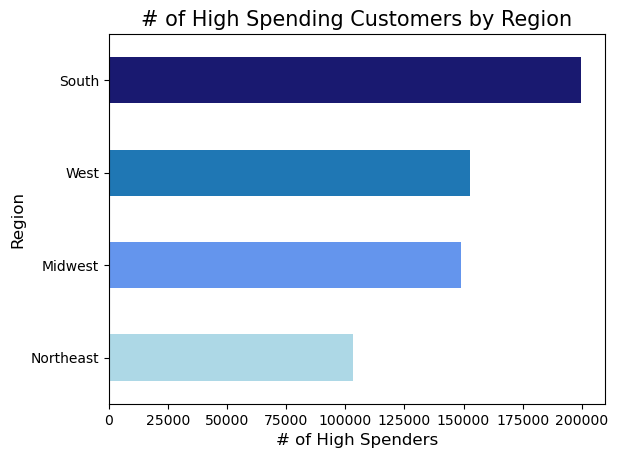

In [82]:
bar_highspenders_region = df_highspenders['regions'].value_counts().sort_values( ).plot.barh(color = ['lightblue', 'cornflowerblue','tab:blue','midnightblue'])
plt.ylabel('Region', fontsize=12)
plt.xlabel('# of High Spenders', fontsize=12) 
plt.title('# of High Spending Customers by Region', fontsize=15)

Seems proportional - no insights

#### 2.6b: Spending Habits by Region

In [83]:
crosstab_region_spendingflag = pd.crosstab(df_active_customers['regions'], df_active_customers['Spending_Flag'], dropna = False)

In [84]:
crosstab_region_spendingflag

Spending_Flag,High spender,Low spender
regions,,
Midwest,148829,7118878
Northeast,103230,5366838
South,199815,10120647
West,152710,7781717


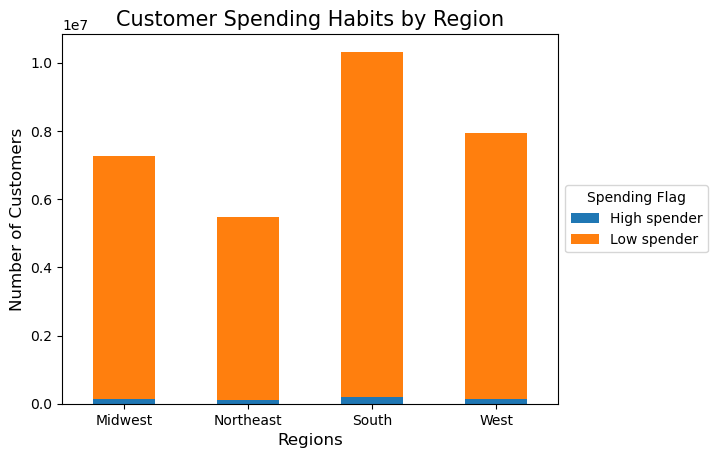

In [85]:
stackedbar_regions_spendingflag = crosstab_region_spendingflag.plot(kind="bar", stacked=True, rot=0)
plt.ylabel('Number of Customers', fontsize=12)
plt.xlabel('Regions', fontsize=12) 
plt.title('Customer Spending Habits by Region', fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title = 'Spending Flag')

#### 2.6c Regions by Mean Prices

In [87]:
df_active_customers.groupby('regions').agg({'prices': ['mean']})

,prices
,mean
regions,
Midwest,7.796782
Northeast,7.786566
South,7.799113
West,7.795047


no insights

## 3. Products

### 3.1 Products by Department

In [38]:
df_active_customers['department'].value_counts()

department
produce            9079276
dairy eggs         5191828
snacks             2766406
beverages          2571934
frozen             2123342
pantry             1782903
bakery             1125026
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699858
breakfast           678095
meat seafood        674785
personal care       424415
babies              410392
international       255991
alcohol             144674
pets                 93065
missing              64768
other                34411
bulk                 33451
Name: count, dtype: int64

Text(0.5, 1.0, 'Total Number of Products Purchased per Department')

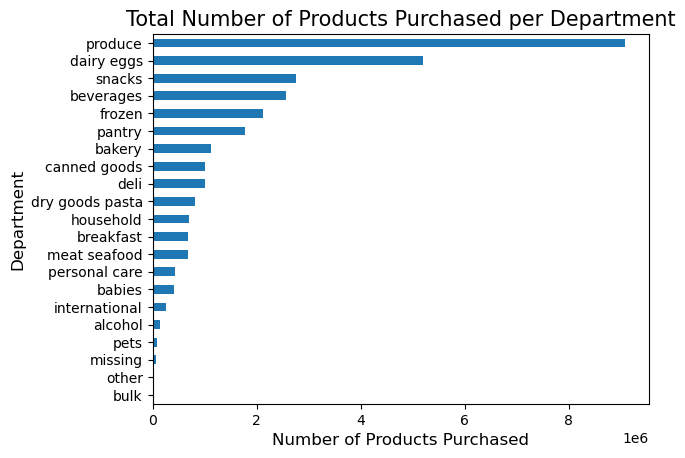

In [39]:
#Visualization
bar_department = df_active_customers['department'].value_counts().sort_values( ).plot.barh()
plt.ylabel('Department', fontsize=12)
plt.xlabel('Number of Products Purchased', fontsize=12) 
plt.title('Total Number of Products Purchased per Department', fontsize=15)

#### 3.1a Department by Income Group

In [42]:
cross_income_department = pd.crosstab(df_active_customers['department'], df_active_customers['income_flag'].sort_values(), dropna = False)

In [43]:
cross_income_department

income_flag,high-income,low-income,middle-income
department,,,
alcohol,39558,34386,70730
babies,102279,73896,234217
bakery,278252,243326,603448
beverages,589731,693590,1288613
breakfast,157313,175828,344954
bulk,7330,8787,17334
canned goods,254052,200443,557579
dairy eggs,1261824,1125107,2804897
deli,240399,227439,535996


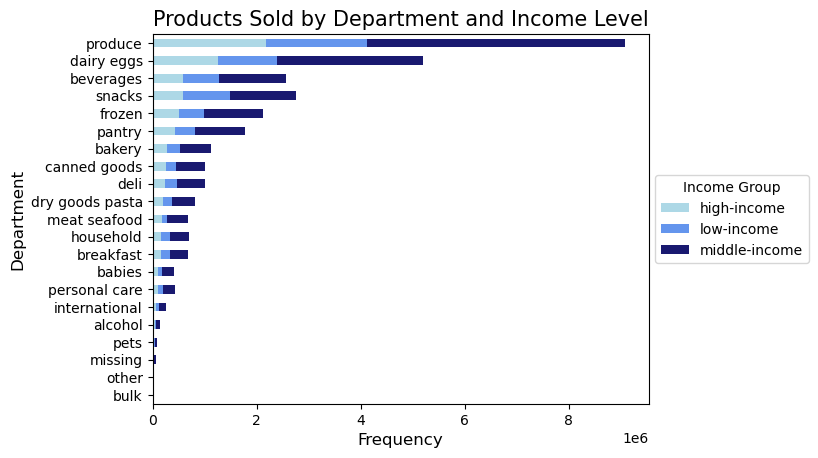

In [98]:
stackedbar_income_department = cross_income_department.sort_values(by='middle-income', ascending= True).plot(kind='barh', stacked=True, color = ['lightblue', 'cornflowerblue', 'midnightblue'])
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Department', fontsize=12)
plt.title('Products Sold by Department and Income Level', fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title = 'Income Group')

#### Same graph without middle income

In [165]:
cross_highlowincome_department = pd.crosstab(df_highlowincome['department'], df_active_customers['income_flag'].sort_values(), dropna = False)

In [166]:
cross_highlowincome_department

income_flag,high-income,low-income
department,,
alcohol,39558,34386
babies,102279,73896
bakery,278252,243326
beverages,589731,693590
breakfast,157313,175828
bulk,7330,8787
canned goods,254052,200443
dairy eggs,1261824,1125107
deli,240399,227439


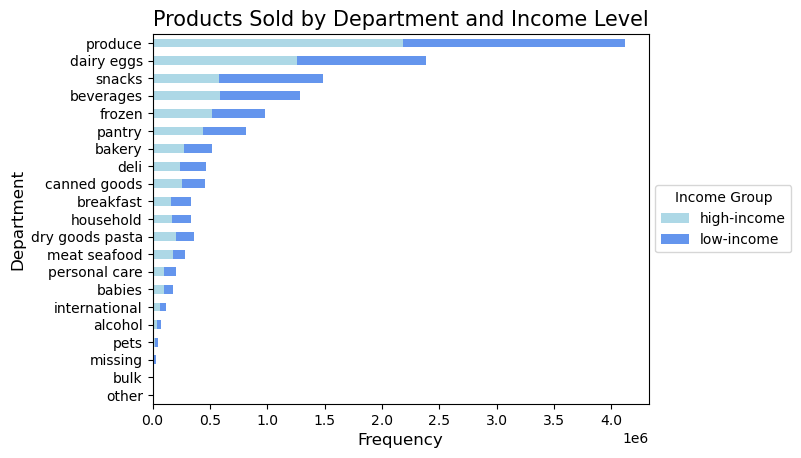

In [174]:
stackedbar_highlowincome_department = cross_highlowincome_department.sort_values(by='low-income', ascending= True).plot(kind='barh', stacked=True, color = ['lightblue', 'cornflowerblue'])
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Department', fontsize=12)
plt.title('Products Sold by Department and Income Level', fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title = 'Income Group')

#### 3.1a Insights

Produce is the overwhelmingly highest selling department
High-income and low-income customers have similar # of customers, but differ slightly in their preferred departments (high-income custoemrs have slightly higher number of customers)

#### 3.1b Department by age group

In [93]:
crosstab_department_age = pd.crosstab(df_active_customers['department'], df_active_customers['age_group'], dropna = False)

In [94]:
crosstab_department_age

age_group,18-34,35-49,50-64,65+
department,,,,
alcohol,40221,33883,31821,36720
babies,107300,101228,88948,106204
bakery,299846,264904,244661,296916
beverages,677024,603832,563982,684028
breakfast,182282,159569,148113,177127
bulk,9021,7987,7037,8945
canned goods,270785,237742,219868,267509
dairy eggs,1390182,1230243,1114478,1372011
deli,266470,237774,217266,265199


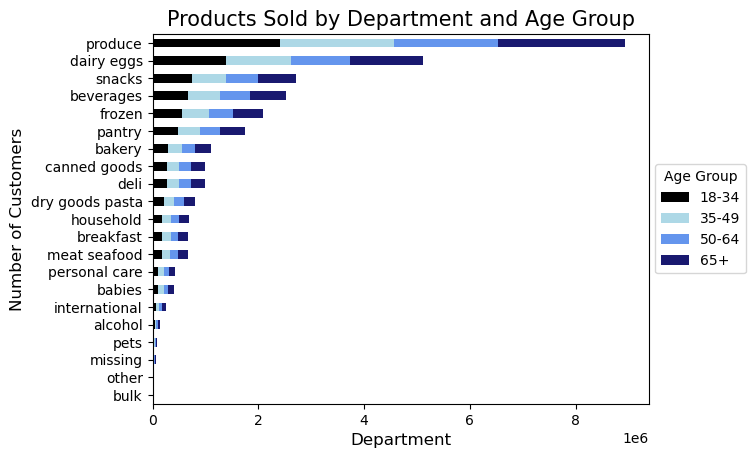

In [95]:
stackedbar_department_age = crosstab_department_age.sort_values(by='18-34', ascending= True).plot(kind='barh', stacked=True, color = ['black','lightblue', 'cornflowerblue', 'midnightblue'])
plt.ylabel('Number of Customers', fontsize=12)
plt.xlabel('Department', fontsize=12) 
plt.title('Products Sold by Department and Age Group', fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title = 'Age Group')

#### 3.1c Product Departments by Family Status

In [48]:
crosstab_department_familystatus = pd.crosstab(df_active_customers['department'], df_active_customers['fam_status'], dropna = False)

In [49]:
crosstab_department_familystatus

fam_status,divorced/widowed,living with parents and siblings,married,single
department,,,,
alcohol,11878,8380,99442,24974
babies,34351,19381,287683,68977
bakery,96044,53910,788630,186442
beverages,220881,119108,1807477,424468
breakfast,57239,33494,476276,111086
bulk,2676,1633,23818,5324
canned goods,84268,48477,712577,166752
dairy eggs,443989,251028,3642585,854226
deli,86749,48119,702333,166633


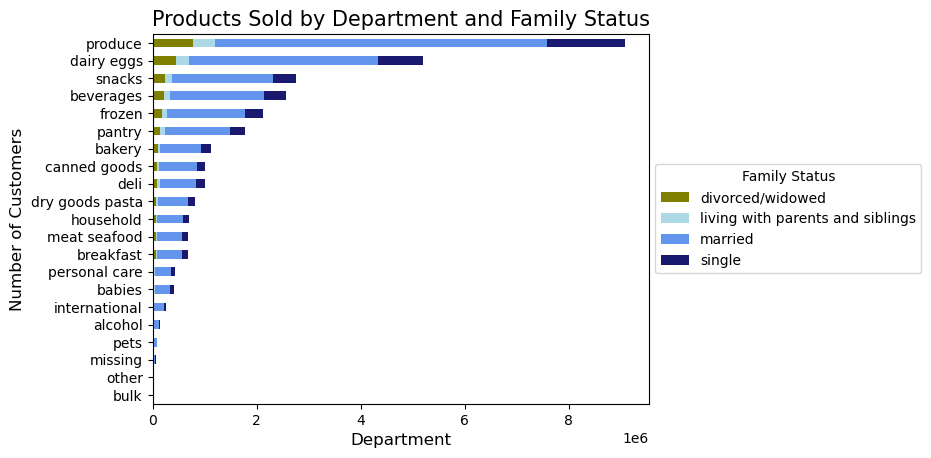

In [53]:
stackedbar_department_age = crosstab_department_familystatus.sort_values(by='married', ascending= True).plot(kind='barh', stacked=True, color = ['olive','lightblue', 'cornflowerblue', 'midnightblue'])
plt.ylabel('Number of Customers', fontsize=12)
plt.xlabel('Department', fontsize=12) 
plt.title('Products Sold by Department and Family Status', fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title = 'Family Status')

No insights

#### 3.2d Departments by Region

In [69]:
crosstab_department_region = pd.crosstab(df_active_customers['department'], df_active_customers['regions'], dropna = False)

In [70]:
crosstab_department_region

regions,Midwest,Northeast,South,West
department,,,,
alcohol,34052,25034,48822,36766
babies,95741,72712,139511,102428
bakery,262614,200136,373055,289221
beverages,598990,462931,859435,650578
breakfast,157781,119327,225539,175448
bulk,7929,5599,11180,8743
canned goods,237459,176936,337458,260221
dairy eggs,1215821,917293,1727823,1330891
deli,234464,178398,333620,257352


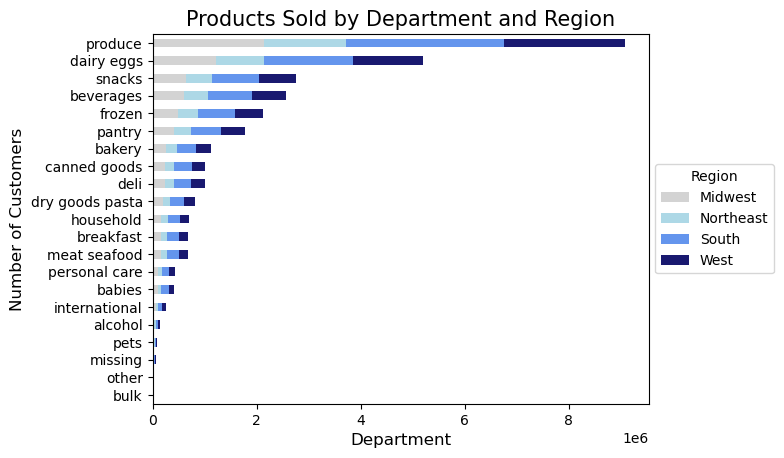

In [74]:
stackedbar_region_age = crosstab_department_region.sort_values(by='South', ascending= True).plot(kind='barh', stacked=True, color = ['lightgrey','lightblue', 'cornflowerblue', 'midnightblue'])
plt.ylabel('Number of Customers', fontsize=12)
plt.xlabel('Department', fontsize=12) 
plt.title('Products Sold by Department and Region', fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title = 'Region')

No insights

#### 3.1e Departments by Number of Dependants

In [65]:
crosstab_department_dependants = pd.crosstab(df_active_customers['department'], df_active_customers['n_dependants'], dropna = False)

In [66]:
crosstab_department_dependants

n_dependants,0,1,2,3
department,,,,
alcohol,36852,35803,34675,37344
babies,103328,99905,104574,102585
bakery,282486,281341,280307,280892
beverages,645349,638754,646892,640939
breakfast,168325,171073,169484,169213
bulk,8000,8573,8475,8403
canned goods,251020,253013,252716,255325
dairy eggs,1298215,1301233,1292617,1299763
deli,253382,247893,249967,252592


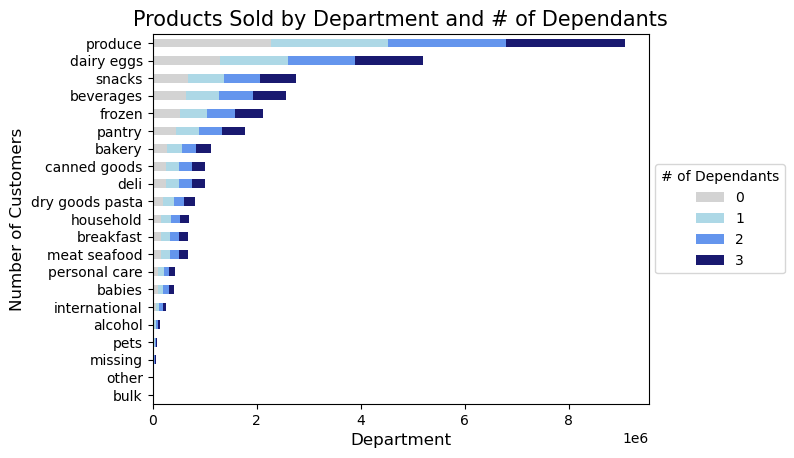

In [67]:
stackedbar_department_age = crosstab_department_dependants.sort_values(by=1, ascending= True).plot(kind='barh', stacked=True, color = ['lightgrey','lightblue', 'cornflowerblue', 'midnightblue'])
plt.ylabel('Number of Customers', fontsize=12)
plt.xlabel('Department', fontsize=12) 
plt.title('Products Sold by Department and # of Dependants', fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title = '# of Dependants')

No Insights

### 3.2 Products by Price Range

Text(0.5, 1.0, 'Products Purchased by Price Range')

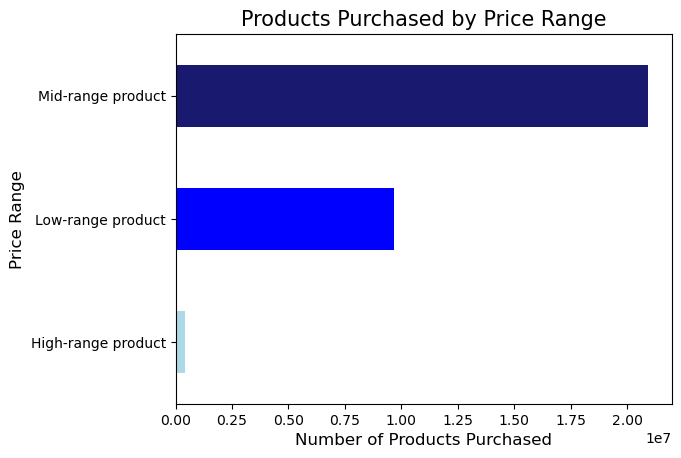

In [47]:
bar_pricerange = df_active_customers['price_range_loc'].value_counts().sort_values( ).plot.barh(color = ['lightblue', 'blue', 'midnightblue'])
plt.ylabel('Price Range', fontsize=12)
plt.xlabel('Number of Products Purchased', fontsize=12) 
plt.title('Products Purchased by Price Range', fontsize=15)

#### 3.2a Preferred Price Range by Age Group

In [51]:
crosstab_pricerange_age = pd.crosstab(df_active_customers['price_range_loc'], df_active_customers['age_group'], dropna = False)

In [52]:
crosstab_pricerange_age

age_group,18-34,35-49,50-64,65+
price_range_loc,,,,
High-range product,105598,93293,85925,106916
Low-range product,2576621,2279103,2101042,2559116
Mid-range product,5567578,4940032,4535495,5536714


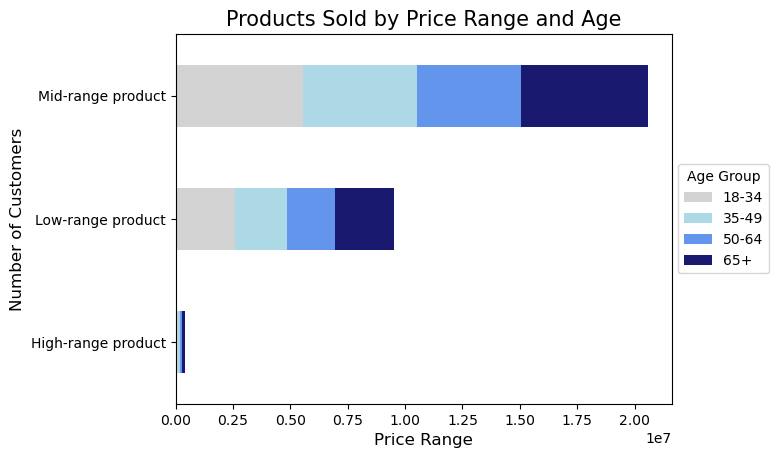

In [53]:
stackedbar_pricerange_age = crosstab_pricerange_age.sort_values(by='18-34', ascending= True).plot(kind='barh', stacked=True, color = ['lightgrey','lightblue', 'cornflowerblue', 'midnightblue'])
plt.ylabel('Number of Customers', fontsize=12)
plt.xlabel('Price Range', fontsize=12) 
plt.title('Products Sold by Price Range and Age', fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title = 'Age Group')

Insights: Pretty even spending patterns across all-ranged products.

##### Isolating high range

In [89]:
df_highrange['age_group'].value_counts()

age_group
65+      106916
18-34    105598
35-49     93293
50-64     85925
Name: count, dtype: int64

Text(0.5, 1.0, '# of High-Range Products Bought by Age Group')

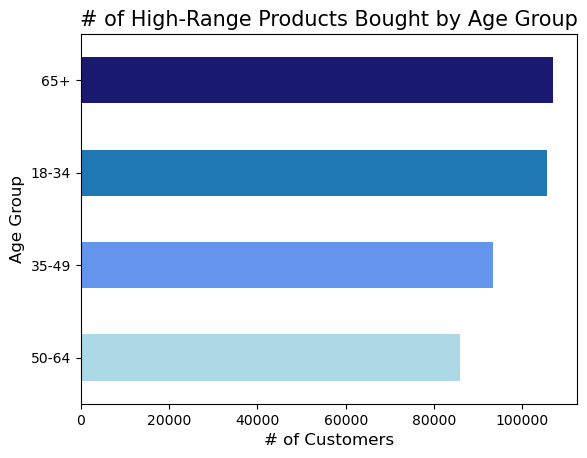

In [91]:
bar_highrange_income = df_highrange['age_group'].value_counts().sort_values( ).plot.barh(color = ['lightblue','cornflowerblue','tab:blue','midnightblue'])
plt.ylabel('Age Group', fontsize=12)
plt.xlabel('# of Customers', fontsize=12) 
plt.title('# of High-Range Products Bought by Age Group', fontsize=15)

##### 3.2a Insights
No Insights

#### 3.2b Preferred Price Range by Income

In [74]:
crosstab_pricerange_income = pd.crosstab(df_active_customers['price_range_loc'], df_active_customers['income_flag'], dropna = False)

In [75]:
crosstab_pricerange_income

income_flag,high-income,low-income,middle-income
price_range_loc,,,
High-range product,106796,62903,228258
Low-range product,2203071,2583160,4888669
Mid-range product,5097974,4468199,11353634


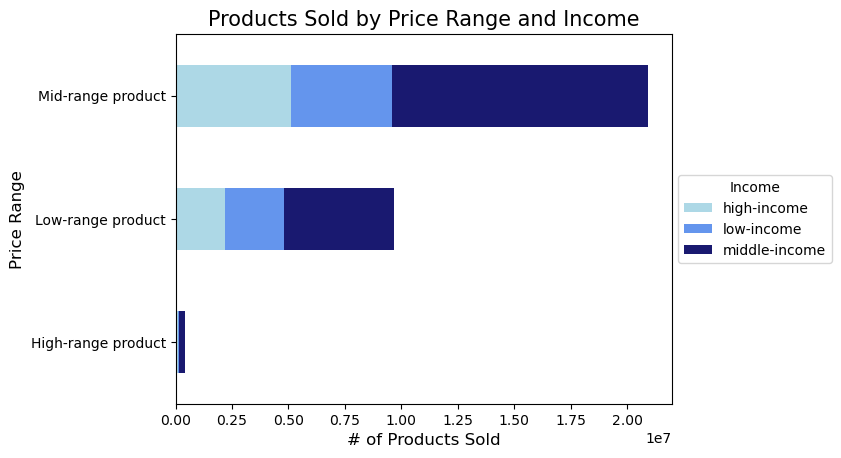

In [92]:
stackedbar_pricerange_income = crosstab_pricerange_income.sort_values(by='middle-income', ascending= True).plot(kind='barh', stacked=True, color = ['lightblue', 'cornflowerblue', 'midnightblue'])
plt.ylabel('Price Range', fontsize=12)
plt.xlabel('# of Products Sold', fontsize=12) 
plt.title('Products Sold by Price Range and Income', fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title = 'Income')

##### For HIgh Income only

In [79]:
crosstab_pricerange_highincome = pd.crosstab(df_active_customers['price_range_loc'], df_highincome['income_flag'], dropna = False)

In [80]:
crosstab_pricerange_highincome

income_flag,high-income
price_range_loc,
High-range product,106796
Low-range product,2203071
Mid-range product,5097974


Text(0.5, 1.0, '# of Products Sold to High Income Customers by Price Range')

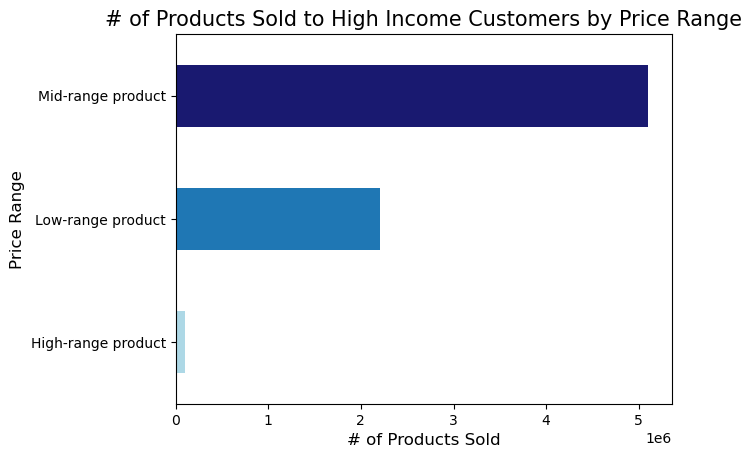

In [93]:
bar_pricerange_highincome = df_highincome['price_range_loc'].value_counts().sort_values( ).plot.barh(color = ['lightblue','tab:blue','midnightblue'])
plt.ylabel('Price Range', fontsize=12)
plt.xlabel('# of Products Sold', fontsize=12) 
plt.title('# of Products Sold to High Income Customers by Price Range', fontsize=15)

##### Isolating High Range Products

In [84]:
df_highrange['income_flag'].value_counts()

income_flag
middle-income    228258
high-income      106796
low-income        62903
Name: count, dtype: int64

Text(0.5, 1.0, '# of High-Range Products Bought by Income')

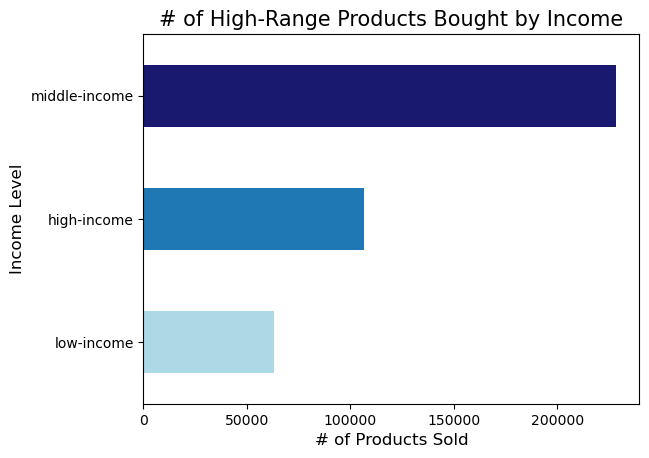

In [94]:
bar_highrange_income = df_highrange['income_flag'].value_counts().sort_values( ).plot.barh(color = ['lightblue','tab:blue','midnightblue'])
plt.ylabel('Income Level', fontsize=12)
plt.xlabel('# of Products Sold', fontsize=12) 
plt.title('# of High-Range Products Bought by Income', fontsize=15)

##### 3.2b Insights
No Insights

#### 3.2c High Range Products by Regions

In [95]:
df_highrange['regions'].value_counts()

regions
South        132663
West         102280
Midwest       93281
Northeast     69733
Name: count, dtype: int64

Text(0.5, 1.0, '# of High-Range Products Bought by Region')

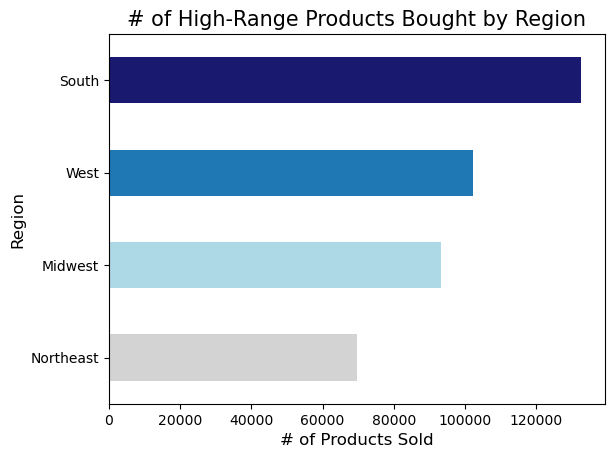

In [64]:
bar_highrange_regions = df_highrange['regions'].value_counts().sort_values( ).plot.barh(color = ['lightgrey','lightblue','tab:blue','midnightblue'])
plt.ylabel('Region', fontsize=12)
plt.xlabel('# of Products Sold', fontsize=12) 
plt.title('# of High-Range Products Bought by Region', fontsize=15)

No Insights

#### 3.2d High Range Products by Family Status

In [97]:
df_highrange['fam_status'].value_counts()

fam_status
married                             281504
single                               63321
divorced/widowed                     34135
living with parents and siblings     18997
Name: count, dtype: int64

Text(0.5, 1.0, '# of High-Range Products Bought by Family Status')

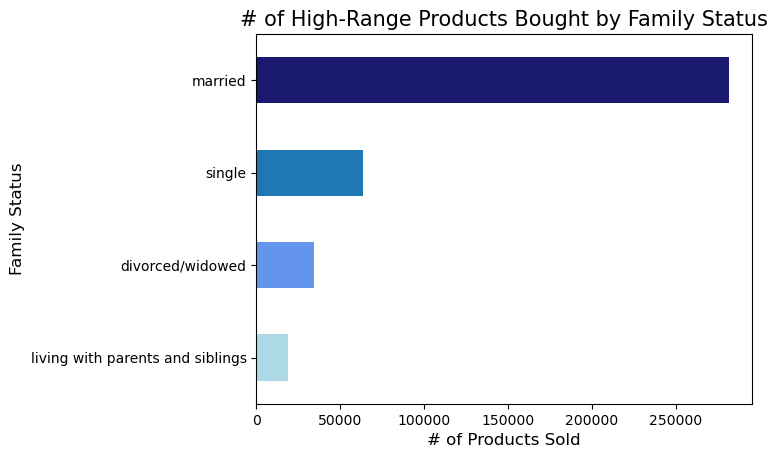

In [99]:
bar_highrange_familystatus = df_highrange['fam_status'].value_counts().sort_values( ).plot.barh(color = ['lightblue','cornflowerblue','tab:blue','midnightblue'])
plt.ylabel('Family Status', fontsize=12)
plt.xlabel('# of Products Sold', fontsize=12) 
plt.title('# of High-Range Products Bought by Family Status', fontsize=15)

No insights

#### 3.2e High Range Products by # of Dependants

In [100]:
df_highrange['n_dependants'].value_counts()

n_dependants
3    100633
2    100250
1     99618
0     97456
Name: count, dtype: int64

Text(0.5, 1.0, '# of High-Range Products Bought by No. of Dependants')

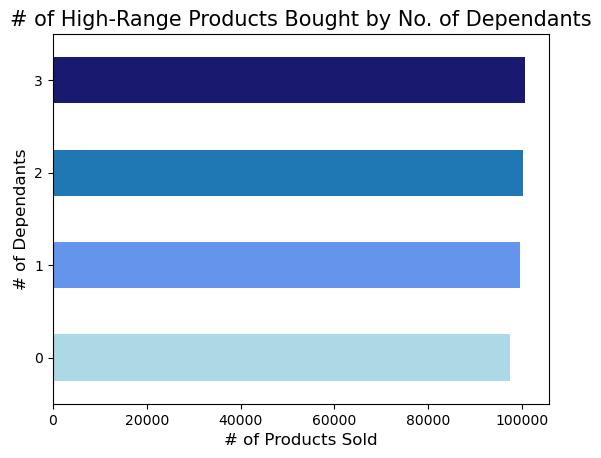

In [101]:
bar_highrange_familystatus = df_highrange['n_dependants'].value_counts().sort_values( ).plot.barh(color = ['lightblue','cornflowerblue','tab:blue','midnightblue'])
plt.ylabel('# of Dependants', fontsize=12)
plt.xlabel('# of Products Sold', fontsize=12) 
plt.title('# of High-Range Products Bought by No. of Dependants', fontsize=15)

No Insights

## Exporting Relevant Visualizations

### Simple Bar Graphs

In [15]:
#Bar: Distribution by Age Group
bar_age_group.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_age_group_410.png') )

In [28]:
#Bar: Distribution by Loyalty Status
bar_loyalty_flag.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_loyalty_410.png'),bbox_inches = 'tight')

In [37]:
#Bar: Distribution by Income Level
bar_income.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_income_410.png'),bbox_inches = 'tight' )

In [164]:
#Bar: Distribution by Family Status
bar_family_status.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_familystatus_410.png'),bbox_inches = 'tight' )

In [54]:
#Bar: Products Sold by Department
bar_department.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_department_410.png'),bbox_inches = 'tight' )

In [84]:
#Bar: Products Sold by Price Range
bar_pricerange.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_pricerange_410.png'),bbox_inches = 'tight' )

In [127]:
#Bar: Spending Flag (High vs. Low Spenders)
bar_spendingflag.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_spendingflag_410.png'),bbox_inches = 'tight' )

In [77]:
#Bar: High Spenders by Age Group
bar_age_highspenders.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_agegroup_highspenders_410.png'),bbox_inches = 'tight' )

In [33]:
#Bar: High Spenders by Income Level
bar_income_highspenders.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_income_highspenders_410.png'),bbox_inches = 'tight' )

In [160]:
#Bar: High Spenders by Family Status
bar_highspenders_famstatus.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_familystatus_highspenders_410.png'),bbox_inches = 'tight' )

In [102]:
#Bar: High Range Products Sold by Income Level
bar_highrange_income.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_highrange_income_410.png'),bbox_inches = 'tight' )

In [50]:
#Bar: # of high spenders by dependants
bar_dependants_highspenders.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_dependants_highspenders_410.png'),bbox_inches = 'tight' )

##### Set of Four Bar Charts Based on Income Level and Each of the Four Family Status Groups:

In [130]:
bar_income_livingwithparents.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_income_livingwithparents_410.png'),bbox_inches = 'tight' )

In [131]:
bar_income_divorced_widowed.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_income_divorced_widowed_410.png'),bbox_inches = 'tight' )

In [132]:
bar_income_single.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_income_single_410.png'),bbox_inches = 'tight' )

In [133]:
bar_income_married.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_income_married_410.png'),bbox_inches = 'tight' )

### Crosstab Stacked Bar Graphs

In [99]:
#stackedbar Income and Department
stackedbar_income_department.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','stackedbar_income_department_410.png'),bbox_inches = 'tight' )

In [82]:
cross_income_department.to_clipboard()

In [96]:
#stackedbar Age and Department
stackedbar_department_age.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','stackedbar_age_department_410.png'),bbox_inches = 'tight' )

In [178]:
#stacked bar loyalty flag by income
stackedbar_income_loyaltyflag.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','stackedbar_income_loyalty_410.png'),bbox_inches = 'tight' )

In [59]:
#stackedbar loyalty flag by income (without middle-income)
stackedbar_highlowincome_loyaltyflag.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','stackedbar_highlowincome_loyalty_410.png'),bbox_inches = 'tight' )

In [86]:
#stackedbar Income and Family Status
stackedbar_income_familystatus.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','stackedbar_income_familystatus_410.png'),bbox_inches = 'tight' )

In [145]:
#stacked bar fam status by age group
stackedbar_age_familystatus.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','stackedbar_age_famstatus_410.png'),bbox_inches = 'tight' )

In [175]:
#stacked bar income and department (without middle-income)
stackedbar_highlowincome_department.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','stackedbar_highlowincome_department_410.png'),bbox_inches = 'tight' )

In [31]:
#stackedbar family status and age group
stackedbar_familystatus_age.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','stackedbar_familystatus_age_410.png'),bbox_inches = 'tight' )

In [38]:
#stackedbar income age
stackedbar_income_age.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','stackedbar_income_age_410.png'),bbox_inches = 'tight' )

In [56]:
#stacked bar: pricerange and age
stackedbar_pricerange_age.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','stackedbar_pricerange_age_410.png'),bbox_inches = 'tight' )

In [60]:
#stacked bar: loyalty/age
stackedbar_age_loyaltyflag.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','stackedbar_loyalty_age_410.png'),bbox_inches = 'tight' )

In [68]:
#stacked bar department age
stackedbar_department_age.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','stackedbar_department_age_410.png'),bbox_inches = 'tight' )

In [75]:
#stacked bar department region
stackedbar_region_age.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','stackedbar_department_region_410.png'),bbox_inches = 'tight' )